In [3]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dfn = pd.read_excel('C:\\Users\\ravi\\Desktop\\Capstone\\Customer Churn Data.xlsx', sheet_name = ['data'])


In [7]:
df=dfn.get('data')

In [8]:
df.head(5)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [9]:
df_c= df.drop(columns='AccountID')

In [10]:
df_c.shape

(11260, 18)

In [11]:
df.shape

(11260, 19)

In [12]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [13]:
df_c.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.0,1.0,1.0


In [14]:
df_c.describe()

,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [15]:
df.isnull().sum()*100/df.isnull().sum().sum()

AccountID                   0.000000
Churn                       0.000000
Tenure                      3.811659
City_Tier                   4.185351
CC_Contacted_LY             3.811659
Payment                     4.073244
Gender                      4.035874
Service_Score               3.662182
Account_user_count          4.185351
account_segment             3.624813
CC_Agent_Score              4.334828
Marital_Status              7.922272
rev_per_month               3.811659
Complain_ly                13.340807
rev_growth_yoy              0.000000
coupon_used_for_payment     0.000000
Day_Since_CC_connect       13.340807
cashback                   17.600897
Login_device                8.258595
dtype: float64

In [16]:
df_c.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [17]:
df_c.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [18]:
df_cc=df.corr()
df_cc

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
AccountID,1.000000,-0.009541,0.001983,0.252562,0.301782,-0.017715,-0.005168
Churn,-0.009541,1.000000,0.084135,0.072071,0.008991,0.105796,0.251488
City_Tier,0.001983,0.084135,1.000000,0.011835,-0.006443,-0.011479,0.002478
CC_Contacted_LY,0.252562,0.072071,0.011835,1.000000,0.060052,-0.000209,0.027244
Service_Score,0.301782,0.008991,-0.006443,0.060052,1.000000,0.032135,0.002643
CC_Agent_Score,-0.017715,0.105796,-0.011479,-0.000209,0.032135,1.000000,-0.031459
Complain_ly,-0.005168,0.251488,0.002478,0.027244,0.002643,-0.031459,1.000000


<AxesSubplot:>

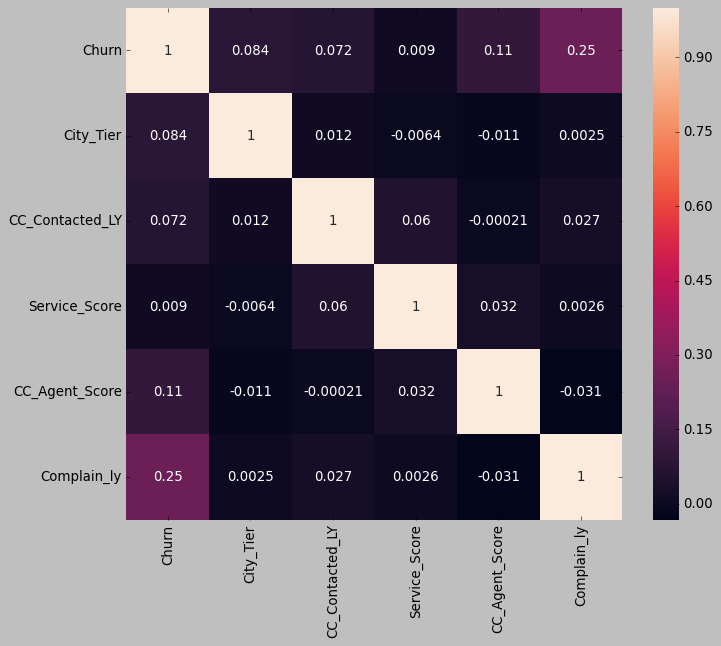

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df_c.corr(),annot=True)

In [20]:
df_cc[df_cc>0.70]

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
AccountID,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Churn,NaN,1.0,NaN,NaN,NaN,NaN,NaN
City_Tier,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CC_Contacted_LY,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Service_Score,NaN,NaN,NaN,NaN,1.0,NaN,NaN
CC_Agent_Score,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Complain_ly,NaN,NaN,NaN,NaN,NaN,NaN,1.0


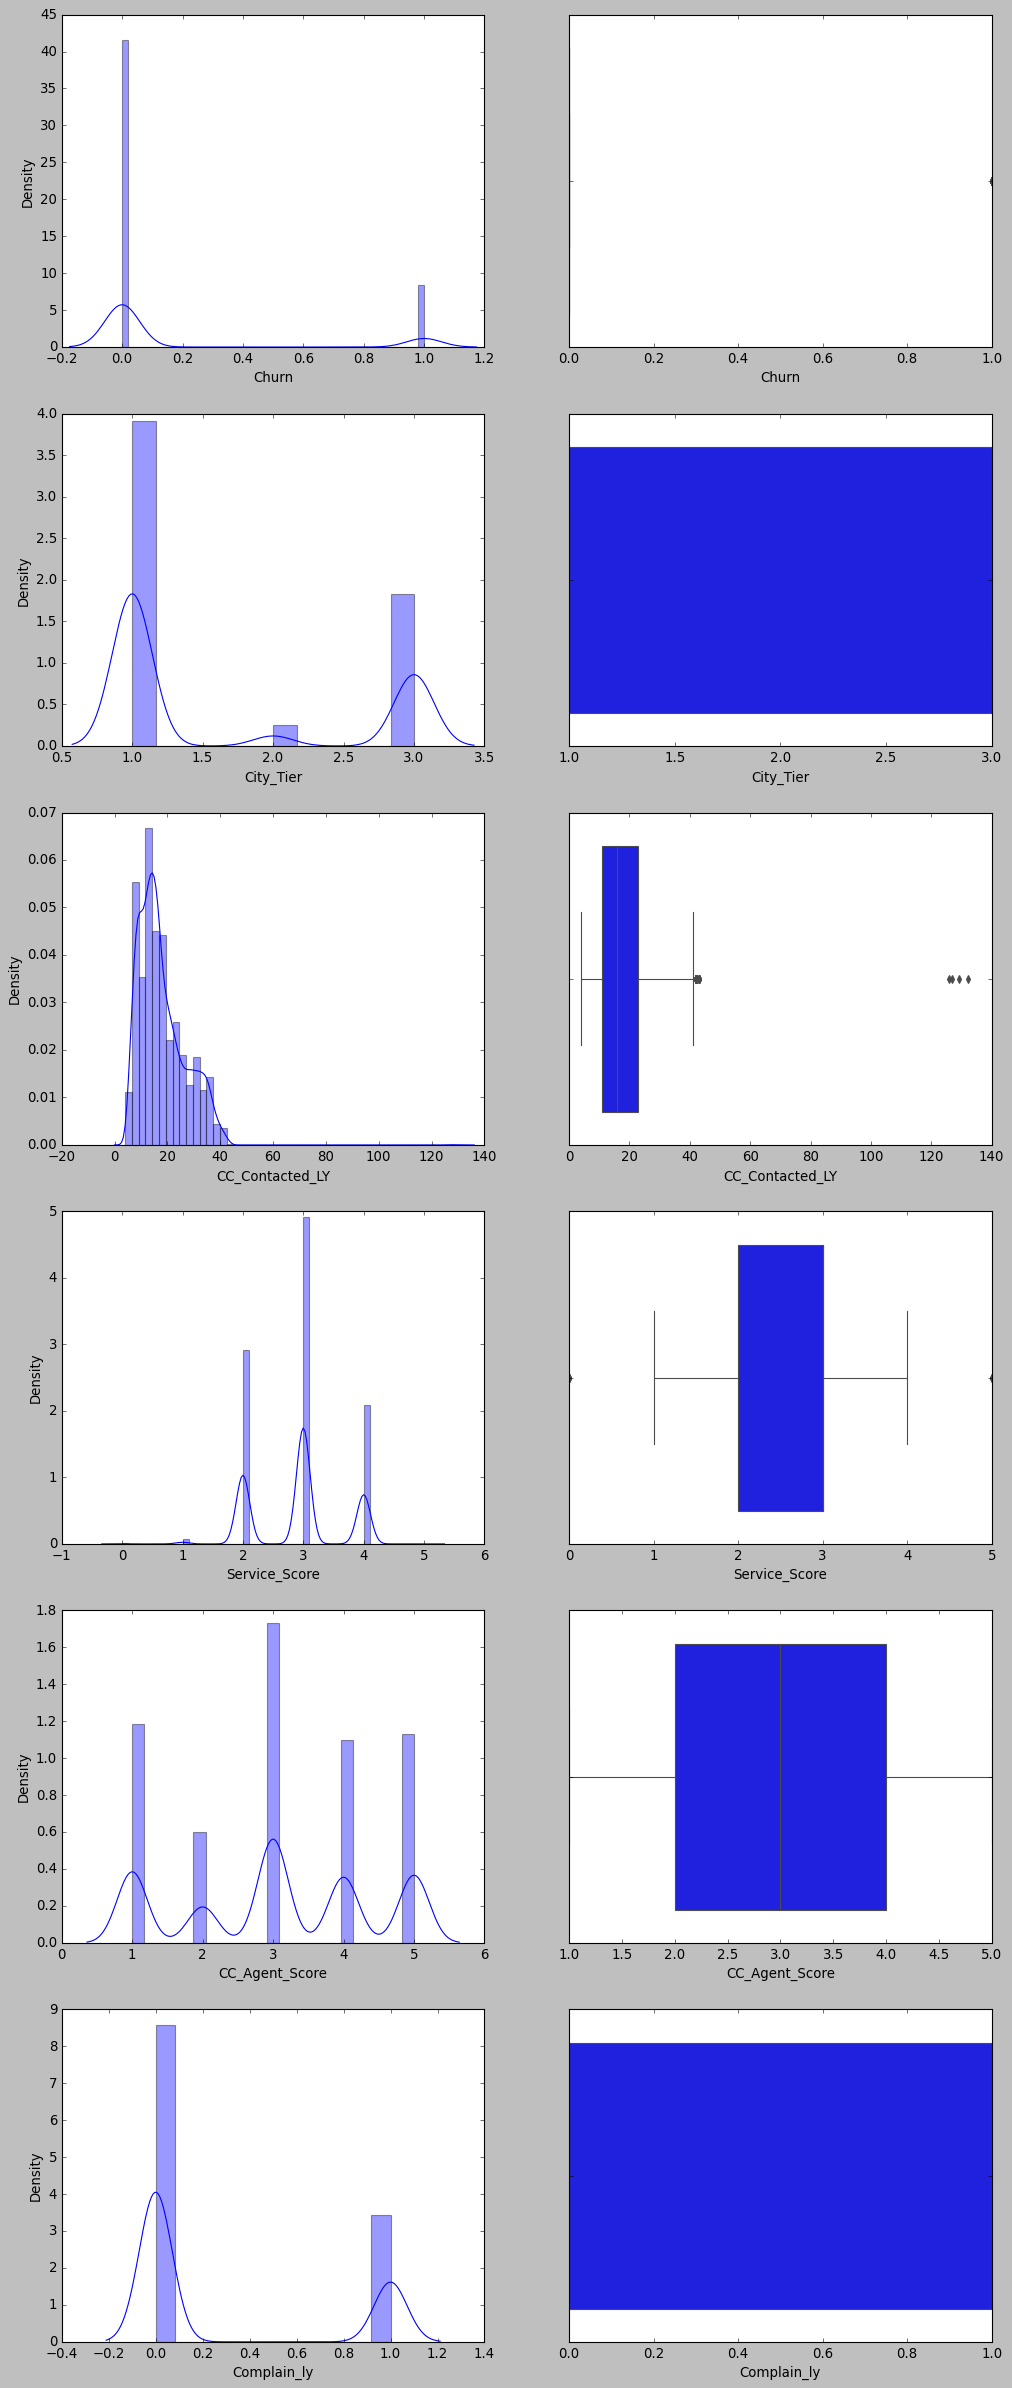

In [21]:
a = 1
plt.figure(figsize=(15, 80))
for i in df[
    [
        'Churn', 'City_Tier', 'CC_Contacted_LY',
        'Service_Score', 'CC_Agent_Score',
       'Complain_ly',
        
        
        
        
        
        
        
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        # plt.title("Histogram for:" + i)
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        # plt.title("Boxplot for:" + i)
        a += 2

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [23]:
for column in df[['Payment', 'Gender', 'Account_user_count','account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Super           4062
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


REV_PER_MONTH :  59
103       1
20        1
23        1
122       1
21        1
100       1
25        1
135       1
111       1
109       1
104       1
120       2
19        2
139       2
114       2
131       2
22        2
121       2
105       2
134       2
125       2
113       

In [24]:
df.shape

(11260, 19)

In [25]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [26]:
## lets see the distribution of our target variable
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [27]:
df.Churn.value_counts()*100/11260

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [28]:
df.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [29]:
df['Tenure'].describe()

count     11158
unique       38
top           1
freq       1351
Name: Tenure, dtype: int64

In [30]:
## sns.histplot(listings['price'],bins=20);
## sns.histplot(df['Tenure'],bins=20)

In [31]:
df.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

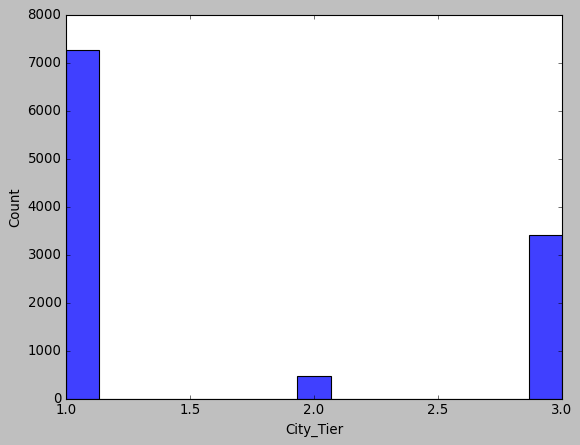

In [32]:
sns.histplot(df['City_Tier']);

In [33]:
df.CC_Contacted_LY.value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='Count'>

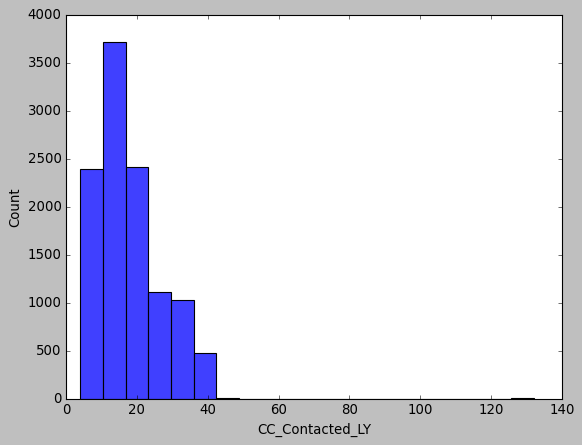

In [34]:
sns.histplot(df['CC_Contacted_LY'], bins=20)

In [35]:
df['CC_Contacted_LY'].describe()

count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64

In [36]:
df['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

<AxesSubplot:ylabel='Count'>

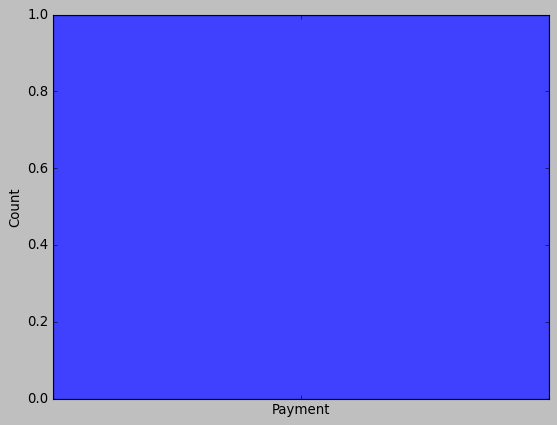

In [37]:
sns.histplot(['Payment'], bins=10)

In [38]:
df['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [39]:
df['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [40]:
df['Service_Score'].describe()

count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64

<AxesSubplot:xlabel='Service_Score', ylabel='Count'>

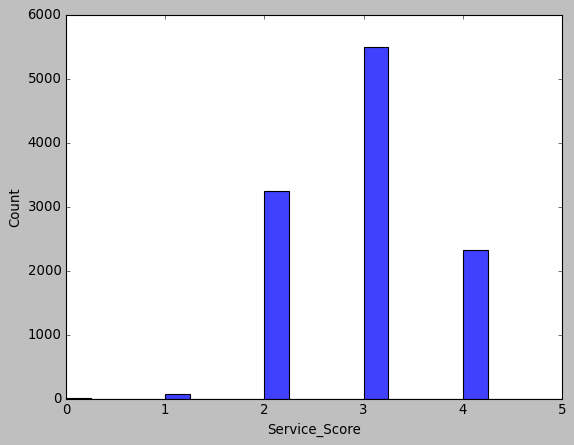

In [41]:
sns.histplot(df['Service_Score'], bins=20)

In [42]:
df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [43]:
df['Account_user_count'].describe()

count     11148
unique        7
top           4
freq       4569
Name: Account_user_count, dtype: int64

In [44]:
df['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [45]:
df['account_segment'].describe()

count     11163
unique        7
top       Super
freq       4062
Name: account_segment, dtype: object

<AxesSubplot:xlabel='account_segment', ylabel='Count'>

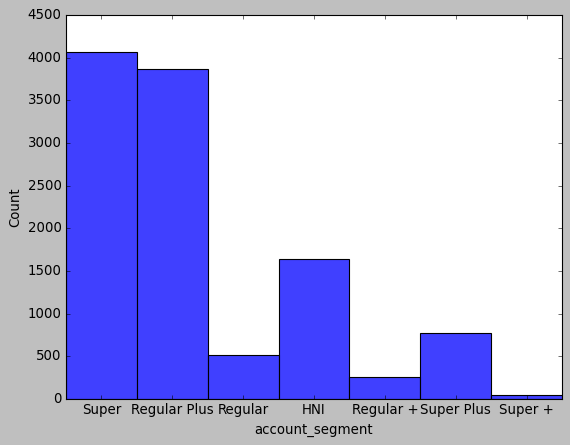

In [46]:
sns.histplot(df['account_segment'], bins=20)

In [47]:
df['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [48]:
df['CC_Agent_Score'].describe()

count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64

<AxesSubplot:xlabel='CC_Agent_Score', ylabel='Count'>

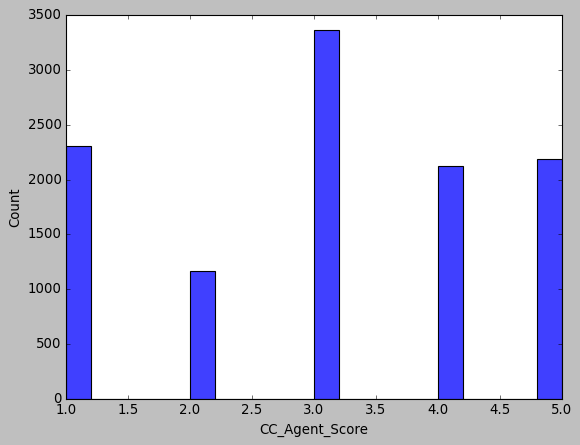

In [49]:
sns.histplot(df['CC_Agent_Score'], bins=20)

In [50]:
df['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [51]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [52]:
print('Before: ',df.shape)
# Replace 0 to Nan and remove all missing values
df.coupon_used_for_payment = df.coupon_used_for_payment.replace(to_replace = '*', value =np.nan)
df.coupon_used_for_payment = df.coupon_used_for_payment.replace(to_replace = '#', value =np.nan)
df.coupon_used_for_payment = df.coupon_used_for_payment.replace(to_replace = '$', value =np.nan)
df.rev_growth_yoy = df.rev_growth_yoy.replace(to_replace = '$', value =np.nan)
df.rev_per_month = df.rev_per_month.replace(to_replace = '+', value =np.nan)
df.Day_Since_CC_connect = df.Day_Since_CC_connect.replace(to_replace = '$', value =np.nan)
print('After: ',df.shape)

Before:  (11260, 19)
After:  (11260, 19)


In [53]:
for column in df[['Payment', 'Gender', 'Account_user_count','account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Super           4062
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


REV_PER_MONTH :  58
103.0       1
20.0        1
23.0        1
122.0       1
104.0       1
100.0       1
25.0        1
135.0       1
111.0       1
109.0       1
21.0        1
19.0        2
139.0       2
131.0       2
22.0        2
120.0       2
121.0       2
105.0       2
114.0     

In [54]:
# df1['Channel'].replace({'Online' : 1, 'Offline' : 0} , inplace = True)
df['Login_device'].replace({'&&&&' : 'Mobile'} , inplace = True)

In [55]:
df['Account_user_count'].replace({'@' : 4}, inplace = True)

In [56]:
df['Gender'].replace({'F' : 'Female' , 'M' : 'Male'}, inplace = True)

In [57]:
for column in df[['Payment', 'Gender', 'Account_user_count','account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  6
6.0     315
1.0     446
2.0     526
5.0    1699
3.0    3261
4.0    4901
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Super           4062
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


REV_PER_MONTH :  58
103.0       1
20.0        1
23.0        1
122.0       1
104.0       1
100.0       1
25.0        1
135.0       1
111.0       1
109.0       1
21.0        1
19.0        2
139.0       2
131.0       2
22.0        2
120.0       2
121.0       2
105.0       2
114.0       2
134.0       2
125.0     

In [58]:
df.shape

(11260, 19)

In [59]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   471
Login_device               221
dtype: int64

In [60]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [61]:
## from sklearn.impute import KNNImputer

##imputer = KNNImputer(n_neighbors=5)

## df_subset = pd.DataFrame(imputer.fit_transform(df.drop(['Gender','Heart-Att'],axis=1)),columns = df.drop(['Gender','Heart-Att'],axis=1).columns)


In [62]:
df=df.dropna(subset=['rev_growth_yoy', 'coupon_used_for_payment'])

In [63]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       358
cashback                   471
Login_device               221
dtype: int64

In [64]:
df['Tenure'].value_counts()

1     1351
0     1230
8      519
9      496
7      450
10     423
3      410
5      403
4      402
11     388
6      363
12     360
13     359
2      354
14     345
15     309
16     291
19     273
18     253
20     217
17     215
21     169
23     169
22     151
24     147
28     137
30     137
99     131
27     130
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [65]:
df['Churn'].value_counts()

0    9358
1    1896
Name: Churn, dtype: int64

In [66]:
df['City_Tier'].value_counts()

1.0    7259
3.0    3403
2.0     480
Name: City_Tier, dtype: int64

In [67]:
df['CC_Contacted_LY'].value_counts()

14.0     681
16.0     662
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
11.0     524
17.0     524
10.0     488
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     180
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      28
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

In [68]:
 df['Payment'].value_counts()

Debit Card          4585
Credit Card         3508
E wallet            1216
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [69]:
df['Service_Score'].value_counts()

3.0    5487
2.0    3248
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [70]:
df['account_segment'].value_counts()

Super           4059
Regular Plus    3860
HNI             1639
Super Plus       770
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [71]:
df['Account_user_count'].value_counts()

4.0    4898
3.0    3260
5.0    1698
2.0     526
1.0     445
6.0     315
Name: Account_user_count, dtype: int64

In [72]:
df['CC_Agent_Score'].value_counts()

3.0    3358
1.0    2301
5.0    2191
4.0    2126
2.0    1162
Name: CC_Agent_Score, dtype: int64

In [73]:
df['Marital_Status'].value_counts()

Married     5859
Single      3515
Divorced    1668
Name: Marital_Status, dtype: int64

In [74]:
df['rev_per_month'].value_counts()

3.0      1745
2.0      1583
5.0      1336
4.0      1218
6.0      1085
7.0       753
8.0       643
9.0       563
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
124.0       5
107.0       5
123.0       5
140.0       4
118.0       4
129.0       4
133.0       4
136.0       4
117.0       3
108.0       3
101.0       3
116.0       3
110.0       3
137.0       3
119.0       3
115.0       3
138.0       3
130.0       3
126.0       3
113.0       3
127.0       3
19.0        2
139.0       2
120.0       2
131.0       2
22.0        2
125.0       2
121.0       2
105.0       2
114.0       2
134.0       2
20.0        1
23.0        1
122.0       1
104.0       1
21.0        1
25.0        1
135.0       1
111.0       1
109.0       1
100.0       1
103.0       1
Name: rev_per_month, dtype: int64

In [75]:
df['Complain_ly'].value_counts()

0.0    7786
1.0    3111
Name: Complain_ly, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11254 non-null  int64  
 1   Churn                    11254 non-null  int64  
 2   Tenure                   11152 non-null  object 
 3   City_Tier                11142 non-null  float64
 4   CC_Contacted_LY          11152 non-null  float64
 5   Payment                  11145 non-null  object 
 6   Gender                   11146 non-null  object 
 7   Service_Score            11156 non-null  float64
 8   Account_user_count       11142 non-null  float64
 9   account_segment          11157 non-null  object 
 10  CC_Agent_Score           11138 non-null  float64
 11  Marital_Status           11042 non-null  object 
 12  rev_per_month            10463 non-null  float64
 13  Complain_ly              10897 non-null  float64
 14  rev_growth_yoy        

In [77]:
df['Day_Since_CC_connect'].value_counts()

3.0     1814
2.0     1572
1.0     1256
8.0     1169
0.0      963
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     182
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
30.0       2
31.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [78]:
df['cashback'].value_counts()

155.62    10
145.08     9
154.73     9
149.68     9
149.36     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5691, dtype: int64

In [79]:
df['Login_device'].value_counts()

Mobile      8018
Computer    3015
Name: Login_device, dtype: int64

In [80]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       358
cashback                   471
Login_device               221
dtype: int64

In [81]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       358
cashback                   471
Login_device               221
dtype: int64

In [82]:
df['City_Tier'].value_counts()

1.0    7259
3.0    3403
2.0     480
Name: City_Tier, dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11254 non-null  int64  
 1   Churn                    11254 non-null  int64  
 2   Tenure                   11152 non-null  object 
 3   City_Tier                11142 non-null  float64
 4   CC_Contacted_LY          11152 non-null  float64
 5   Payment                  11145 non-null  object 
 6   Gender                   11146 non-null  object 
 7   Service_Score            11156 non-null  float64
 8   Account_user_count       11142 non-null  float64
 9   account_segment          11157 non-null  object 
 10  CC_Agent_Score           11138 non-null  float64
 11  Marital_Status           11042 non-null  object 
 12  rev_per_month            10463 non-null  float64
 13  Complain_ly              10897 non-null  float64
 14  rev_growth_yoy        

In [84]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [85]:
## df["Tenure"].replace(np.nan,df["Tenure"].median(),inplace=True)
#df["City_Tier"].replace(np.nan,df["City_Tier"].mode(),inplace=True)
df["CC_Contacted_LY"].replace(np.nan,df["CC_Contacted_LY"].median(),inplace=True)
#df["Payment"].replace(np.nan,df["Payment"].median(),inplace=True)
#df["Gender"].replace(np.nan,df["Gender"].mode(),inplace=True)
df["Service_Score"].replace(np.nan,df["Service_Score"].median(),inplace=True)
df["Account_user_count"].replace(np.nan,df["Account_user_count"].median(),inplace=True)
#df["account_segment"].replace(np.nan,df["account_segment"].median(),inplace=True)
df["CC_Agent_Score"].replace(np.nan,df["CC_Agent_Score"].median(),inplace=True)
# df["Marital_Status"].replace(np.nan,df["Marital_Status"].mode(),inplace=True)
df["rev_per_month"].replace(np.nan,df["rev_per_month"].median(),inplace=True)
df["Complain_ly"].replace(np.nan,df["Complain_ly"].median(),inplace=True)
df["Day_Since_CC_connect"].replace(np.nan,df["Day_Since_CC_connect"].median(),inplace=True)
# df["cashback"].replace(np.nan,df["cashback"].mode(),inplace=True)


In [86]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [87]:
df.Tenure.value_counts()

1     1351
0     1230
8      519
9      496
7      450
10     423
3      410
5      403
4      402
11     388
6      363
12     360
13     359
2      354
14     345
15     309
16     291
19     273
18     253
20     217
17     215
21     169
23     169
22     151
24     147
28     137
30     137
99     131
27     130
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [88]:
df.Tenure = df.Tenure.replace(to_replace = '#', value =np.nan)
#df.Tenure.dropna(inplace=True)
df["Tenure"].replace(np.nan,df["Tenure"].median(),inplace=True)

In [89]:
df.Tenure.value_counts()

1.0     1351
0.0     1230
9.0      714
8.0      519
7.0      450
10.0     423
3.0      410
5.0      403
4.0      402
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     309
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
23.0     169
21.0     169
22.0     151
24.0     147
30.0     137
28.0     137
99.0     131
27.0     130
26.0     122
25.0     114
29.0     114
31.0      96
50.0       2
60.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64

In [90]:
df.Payment.value_counts()

Debit Card          4585
Credit Card         3508
E wallet            1216
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [91]:
df['Payment'].dropna(inplace=True)

In [92]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [93]:
df['Gender'].value_counts()

Male      6699
Female    4447
Name: Gender, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11254 non-null  int64  
 1   Churn                    11254 non-null  int64  
 2   Tenure                   11254 non-null  float64
 3   City_Tier                11142 non-null  float64
 4   CC_Contacted_LY          11254 non-null  float64
 5   Payment                  11145 non-null  object 
 6   Gender                   11146 non-null  object 
 7   Service_Score            11254 non-null  float64
 8   Account_user_count       11254 non-null  float64
 9   account_segment          11157 non-null  object 
 10  CC_Agent_Score           11254 non-null  float64
 11  Marital_Status           11042 non-null  object 
 12  rev_per_month            11254 non-null  float64
 13  Complain_ly              11254 non-null  float64
 14  rev_growth_yoy        

In [95]:
## df["Tenure"].replace(np.nan,df["Tenure"].median(),inplace=True)
df["City_Tier"].replace(np.nan,1.0,inplace=True)

In [96]:
df["City_Tier"].mode()

0    1.0
dtype: float64

In [97]:
df["Payment"].replace(np.nan,"Debit Card",inplace=True)

In [98]:
df.Payment.value_counts()

Debit Card          4694
Credit Card         3508
E wallet            1216
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [99]:
df['Gender'].replace(np.nan,"Male",inplace=True)

In [100]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [101]:
df['account_segment'].value_counts()

Super           4059
Regular Plus    3860
HNI             1639
Super Plus       770
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [102]:
# df['Gender'].replace({'F' : 'Female' , 'M' : 'Male'}, inplace = True)
df['account_segment'].replace({'Regular +' : 'Regular Plus' , 'Super +' : 'Super Plus'}, inplace = True)
df['account_segment'].replace(np.nan,"Regular Plus",inplace=True)
df['account_segment'].value_counts()

Regular Plus    4219
Super           4059
HNI             1639
Super Plus       817
Regular          520
Name: account_segment, dtype: int64

In [103]:
df['Marital_Status'].replace(np.nan, 'Married', inplace=True)

In [104]:
df.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [105]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [106]:
df['cashback'].value_counts()

155.62    10
145.08     9
154.73     9
149.68     9
149.36     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5691, dtype: int64

In [107]:
df['cashback'].replace(np.nan, 155.62, inplace=True)

In [108]:
df.cashback = df.cashback.replace(to_replace = '$', value =np.nan)
#df.Tenure.dropna(inplace=True)
df["cashback"].replace(np.nan,df["cashback"].median(),inplace=True)

In [109]:
df['cashback'].value_counts()

155.62    481
154.73      9
149.36      9
152.28      9
145.08      9
         ... 
131.55      1
245.64      1
130.78      1
299.72      1
191.42      1
Name: cashback, Length: 5690, dtype: int64

In [110]:
df['Login_device'].replace(np.nan, 'Mobile', inplace=True)

In [111]:
df['Login_device'].value_counts()

Mobile      8239
Computer    3015
Name: Login_device, dtype: int64

In [112]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11254 non-null  int64  
 1   Churn                    11254 non-null  int64  
 2   Tenure                   11254 non-null  float64
 3   City_Tier                11254 non-null  float64
 4   CC_Contacted_LY          11254 non-null  float64
 5   Payment                  11254 non-null  object 
 6   Gender                   11254 non-null  object 
 7   Service_Score            11254 non-null  float64
 8   Account_user_count       11254 non-null  float64
 9   account_segment          11254 non-null  object 
 10  CC_Agent_Score           11254 non-null  float64
 11  Marital_Status           11254 non-null  object 
 12  rev_per_month            11254 non-null  float64
 13  Complain_ly              11254 non-null  float64
 14  rev_growth_yoy        

In [114]:
df_n=df

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11254.0,25630.470944,3250.992885,20000.0,22815.25,25630.50,28445.75,31259.0
Churn,11254.0,0.168473,0.374303,0.0,0.00,0.00,0.00,1.0
Tenure,11254.0,10.984450,12.758990,0.0,2.00,9.00,16.00,99.0
City_Tier,11254.0,1.647414,0.912746,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11254.0,17.848409,8.813466,4.0,11.00,16.00,23.00,132.0
Service_Score,11254.0,2.903590,0.722516,0.0,2.00,3.00,3.00,5.0
Account_user_count,11254.0,3.705083,1.004220,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11254.0,3.066110,1.372788,1.0,2.00,3.00,4.00,5.0
rev_per_month,11254.0,6.267727,11.491833,1.0,3.00,5.00,7.00,140.0
Complain_ly,11254.0,0.276435,0.447254,0.0,0.00,0.00,1.00,1.0


In [116]:
print (df.Payment.value_counts())
print (df.Gender.value_counts())
print (df.account_segment.value_counts())
print (df.Marital_Status.value_counts())
print (df.cashback.value_counts())
print (df.Login_device.value_counts())

Debit Card          4694
Credit Card         3508
E wallet            1216
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64
Male      6807
Female    4447
Name: Gender, dtype: int64
Regular Plus    4219
Super           4059
HNI             1639
Super Plus       817
Regular          520
Name: account_segment, dtype: int64
Married     6071
Single      3515
Divorced    1668
Name: Marital_Status, dtype: int64
155.62    481
154.73      9
149.36      9
152.28      9
145.08      9
         ... 
131.55      1
245.64      1
130.78      1
299.72      1
191.42      1
Name: cashback, Length: 5690, dtype: int64
Mobile      8239
Computer    3015
Name: Login_device, dtype: int64


In [117]:
# df['cashback'].replace(np.nan, 155.62, inplace=True)
df['Tenure'].replace( 0, 0.01, inplace=True)


In [118]:
df['Noise_index']=df['CC_Contacted_LY']/df['Tenure']
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Noise_index
0,20000,1,4.00,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile,1.5
1,20001,1,0.01,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile,800.0
2,20002,1,0.01,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,155.62,Mobile,3000.0
3,20003,1,0.01,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile,1500.0
4,20004,1,0.01,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile,1200.0


In [119]:
df['Benefit_recevby_customer']=df['cashback']/df['Tenure']
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,...,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Noise_index,Benefit_recevby_customer
0,20000,1,4.00,3.0,6.0,Debit Card,Female,3.0,3.0,Super,...,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile,1.5,39.9825
1,20001,1,0.01,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,...,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile,800.0,12090.0000
2,20002,1,0.01,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,...,Single,6.0,1.0,14.0,0.0,3.0,155.62,Mobile,3000.0,15562.0000
3,20003,1,0.01,3.0,15.0,Debit Card,Male,2.0,4.0,Super,...,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile,1500.0,13407.0000
4,20004,1,0.01,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,...,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile,1200.0,12960.0000


In [120]:
df.groupby(["account_segment"])['Benefit_recevby_customer'].mean()

account_segment
HNI              967.265863
Regular          128.291171
Regular Plus    3022.176644
Super           1365.777547
Super Plus        86.318716
Name: Benefit_recevby_customer, dtype: float64

In [121]:
df.groupby(["account_segment"])['rev_per_month'].sum()

account_segment
HNI             11034.0
Regular          3541.0
Regular Plus    24608.0
Super           25665.0
Super Plus       5689.0
Name: rev_per_month, dtype: float64

In [122]:
df.groupby(["account_segment"])['Service_Score'].mean()

account_segment
HNI             2.921293
Regular         2.857692
Regular Plus    2.927471
Super           2.893323
Super Plus      2.824969
Name: Service_Score, dtype: float64

## Univariate Analysis

AxesSubplot(0.125,0.1;0.775x0.8)


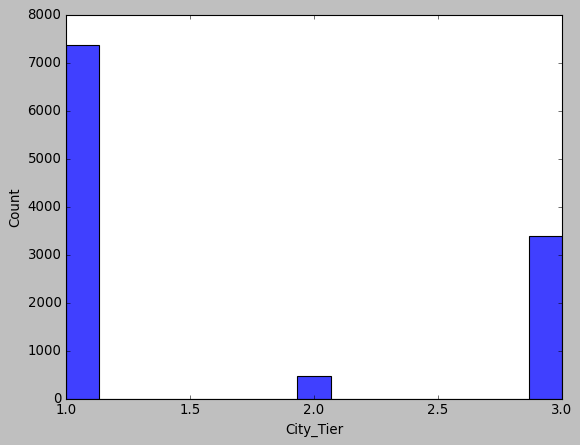

In [123]:
print(sns.histplot(df['City_Tier']));

AxesSubplot(0.125,0.1;0.775x0.8)


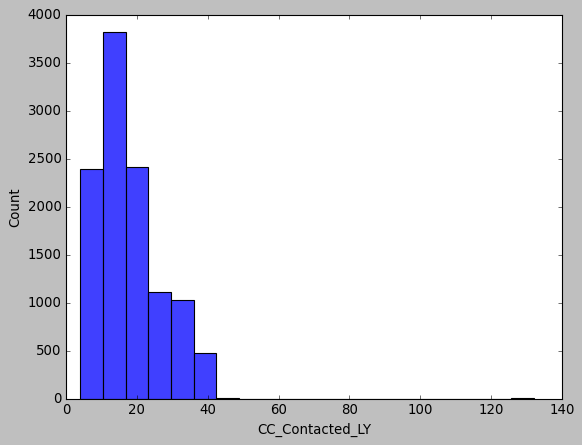

In [124]:
print(sns.histplot(df['CC_Contacted_LY'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


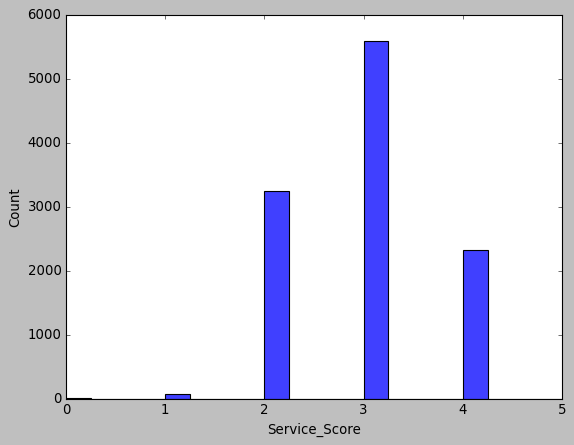

In [125]:
print(sns.histplot(df['Service_Score'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


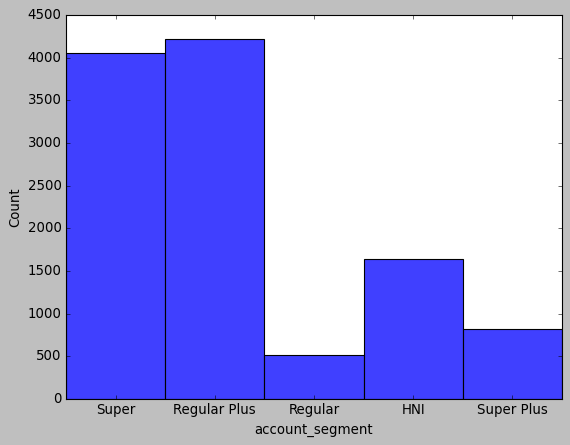

In [126]:
print(sns.histplot(df['account_segment'], bins=10));

AxesSubplot(0.125,0.1;0.775x0.8)


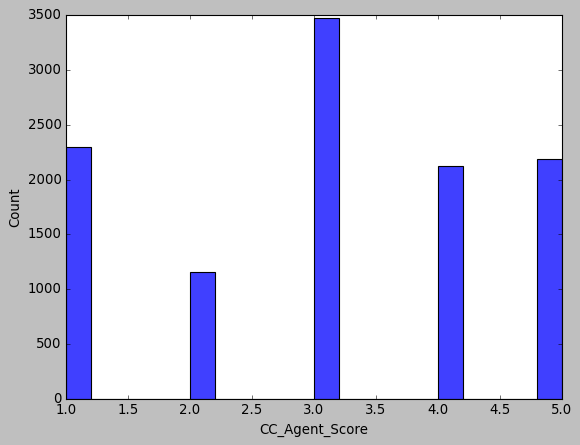

In [127]:
print(sns.histplot(df['CC_Agent_Score'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


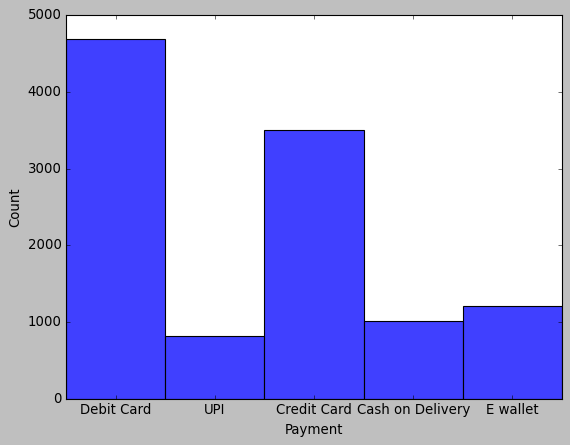

In [128]:
print(sns.histplot(df['Payment'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


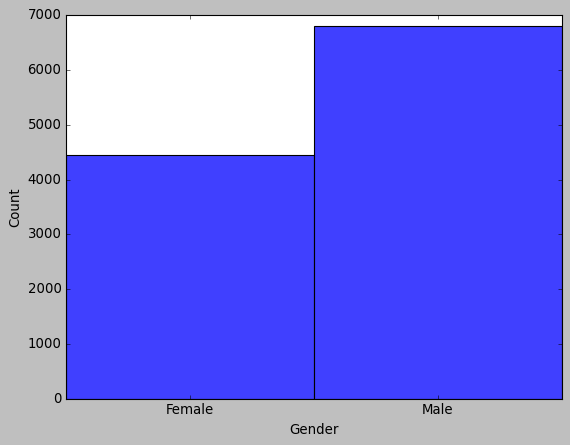

In [129]:
print(sns.histplot(df['Gender'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


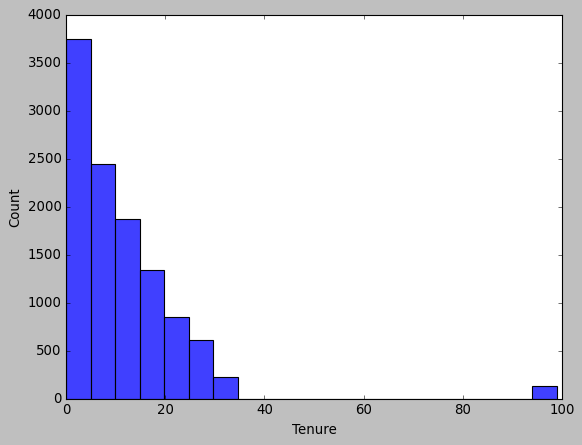

In [130]:
print(sns.histplot(df['Tenure'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


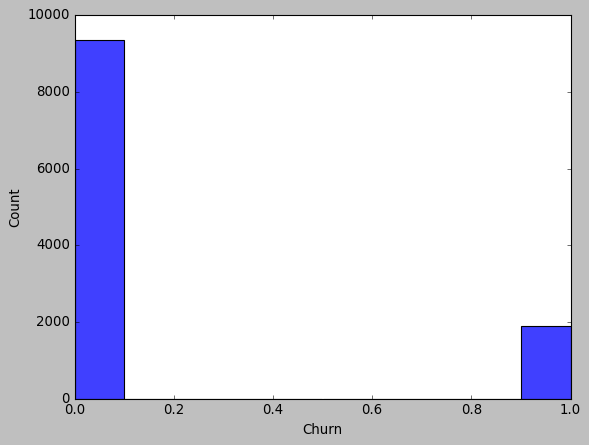

In [131]:
print(sns.histplot(df['Churn'], bins=10));

In [132]:
df['Churn'].value_counts()

0    9358
1    1896
Name: Churn, dtype: int64

AxesSubplot(0.125,0.1;0.775x0.8)


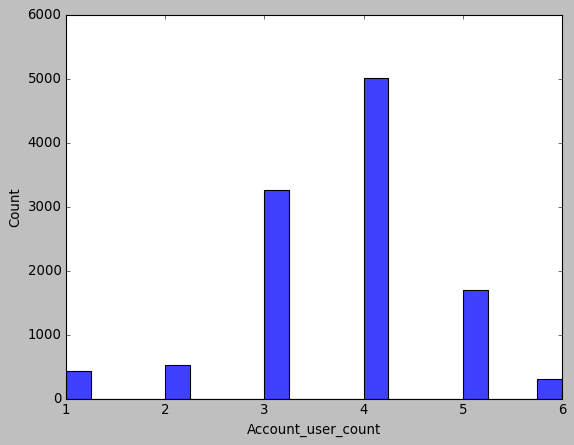

In [133]:
print(sns.histplot(df['Account_user_count'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


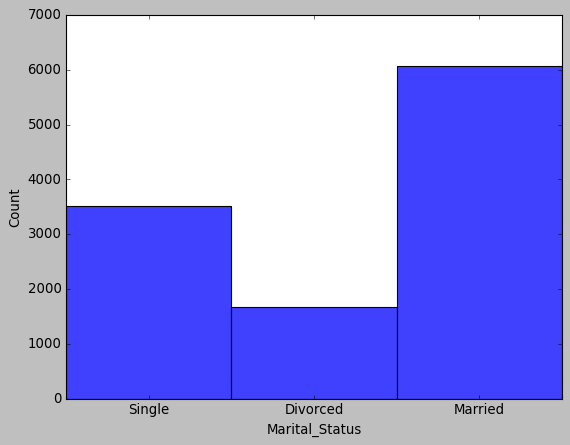

In [134]:
print(sns.histplot(df['Marital_Status'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


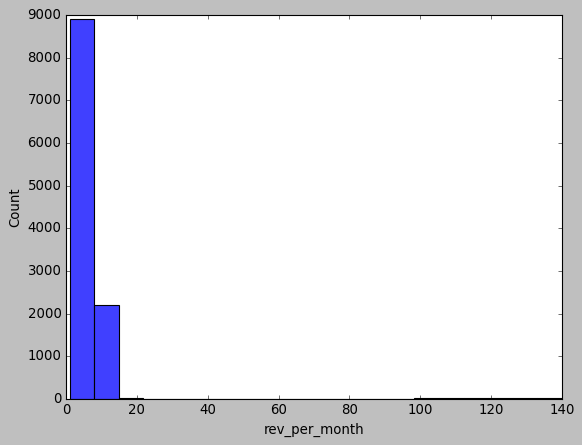

In [135]:
print(sns.histplot(df['rev_per_month'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


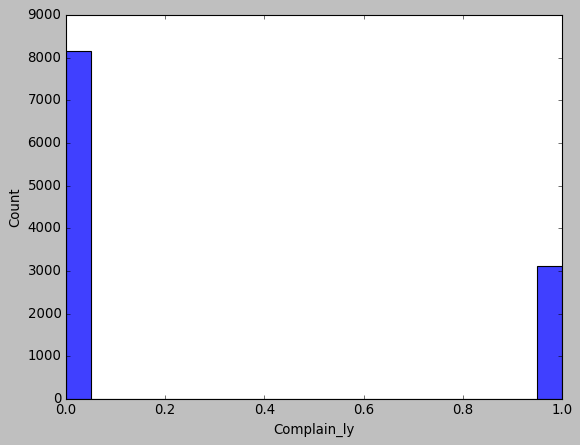

In [136]:
print(sns.histplot(df['Complain_ly'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


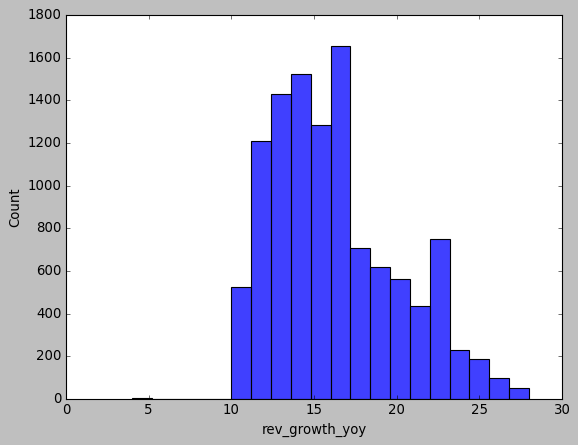

In [137]:
print(sns.histplot(df['rev_growth_yoy'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


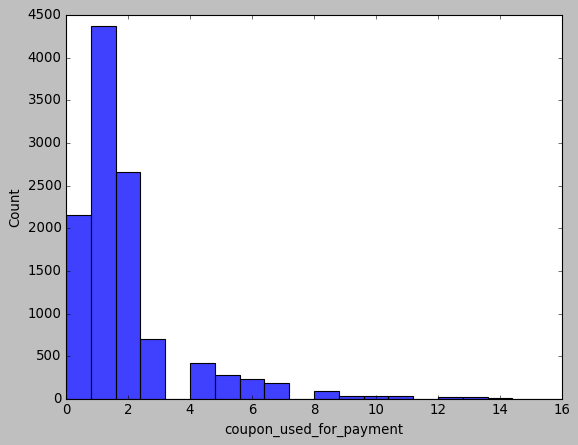

In [138]:
print(sns.histplot(df['coupon_used_for_payment'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


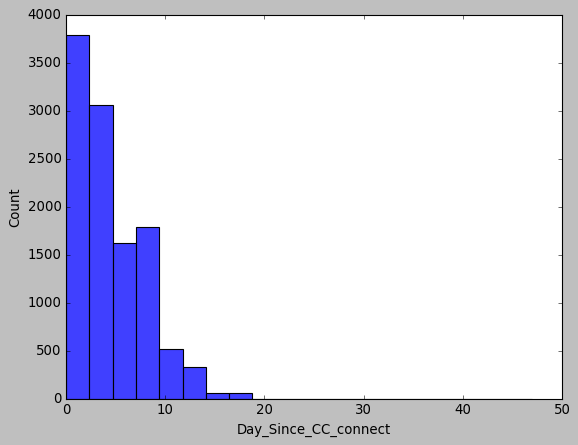

In [139]:
print(sns.histplot(df['Day_Since_CC_connect'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


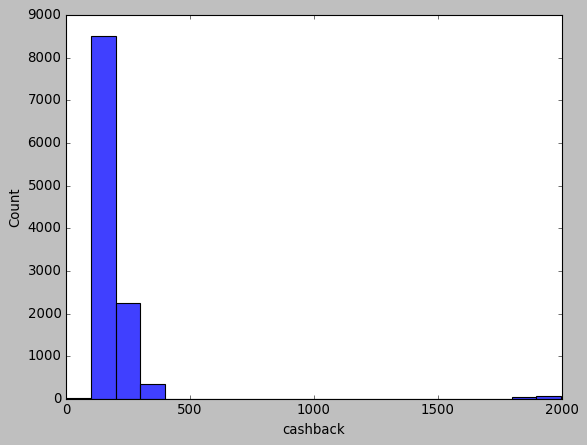

In [140]:
print(sns.histplot(df['cashback'], bins=20));

AxesSubplot(0.125,0.1;0.775x0.8)


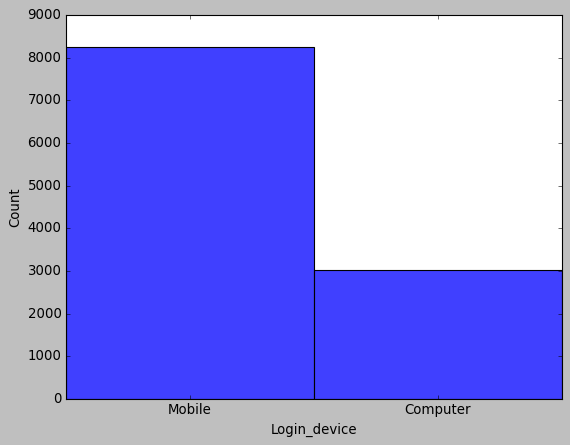

In [141]:
print(sns.histplot(df_n['Login_device'], bins=20));

# Byvariate Analysis

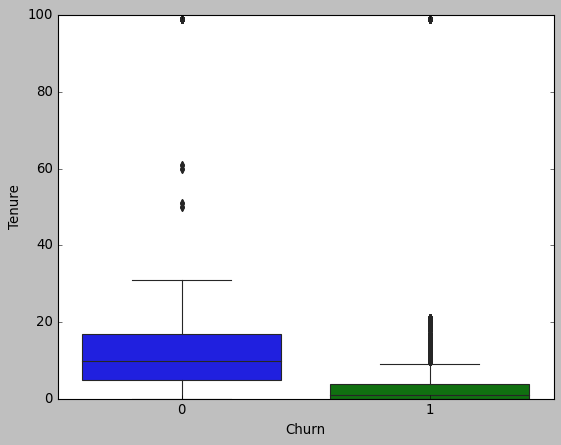

In [142]:
sns.boxplot(x="Churn", y='Tenure', data=df);

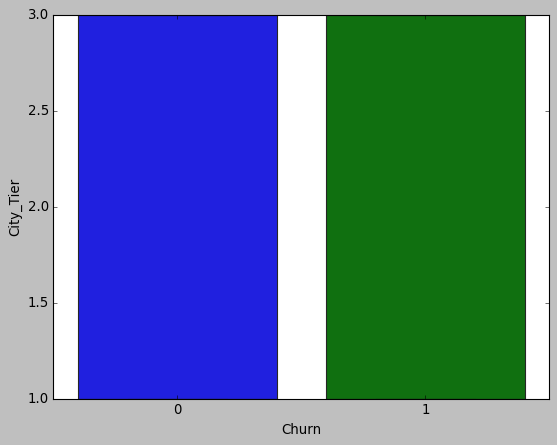

In [143]:
sns.boxplot(x="Churn", y='City_Tier', data=df);

In [144]:
df.groupby(["account_segment", "Churn"])["Churn"].count()

account_segment  Churn
HNI              0        1384
                 1         255
Regular          0         480
                 1          40
Regular Plus     0        3074
                 1        1145
Super            0        3643
                 1         416
Super Plus       0         777
                 1          40
Name: Churn, dtype: int64

In [145]:
df.groupby(["account_segment", "Churn"])['Account_user_count'].mean()

account_segment  Churn
HNI              0        3.763006
                 1        3.945098
Regular          0        3.775000
                 1        4.300000
Regular Plus     0        3.606051
                 1        3.943231
Super            0        3.658798
                 1        3.966346
Super Plus       0        3.598456
                 1        3.100000
Name: Account_user_count, dtype: float64

In [146]:
df.groupby(["account_segment"])['Account_user_count', "rev_per_month"].mean()

,Account_user_count,rev_per_month
account_segment,,
HNI,3.791336,6.732154
Regular,3.815385,6.809615
Regular Plus,3.697559,5.832662
Super,3.690318,6.322986
Super Plus,3.574051,6.963280


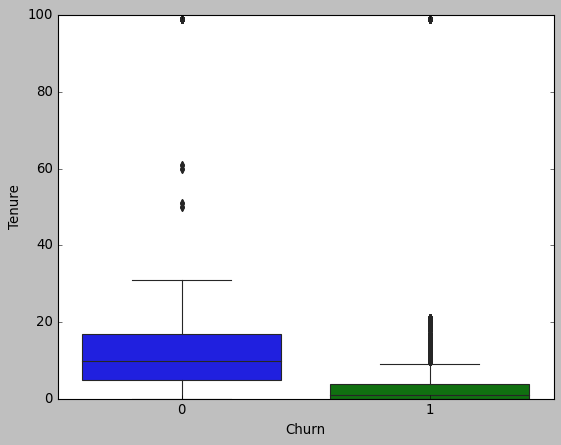

In [147]:
sns.boxplot(x="Churn", y='Tenure', data=df);

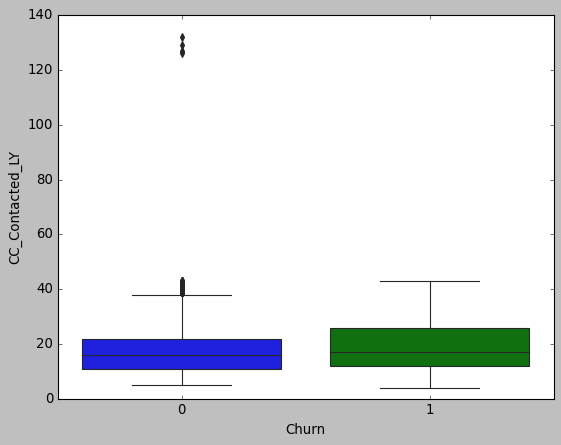

In [148]:
sns.boxplot(x="Churn", y='CC_Contacted_LY', data=df);

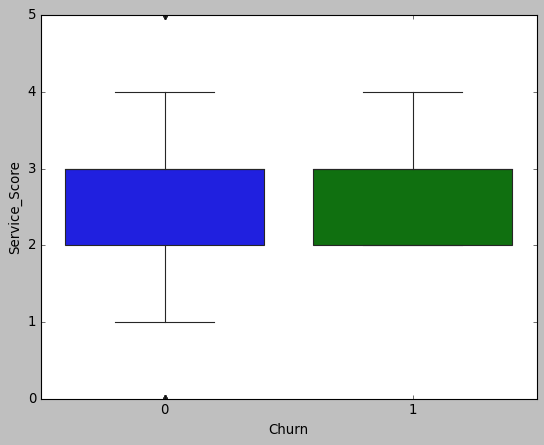

In [149]:
sns.boxplot(x="Churn", y='Service_Score', data=df);

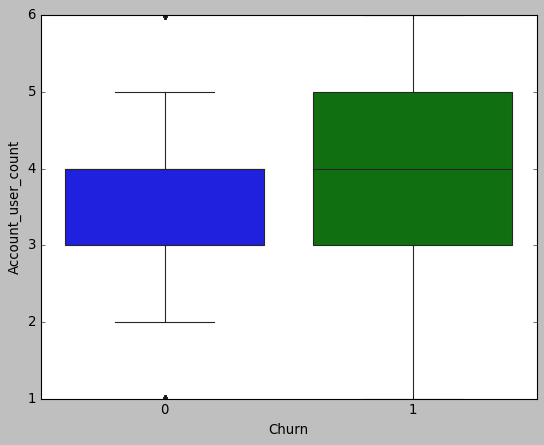

In [150]:
sns.boxplot(x="Churn", y='Account_user_count', data=df);

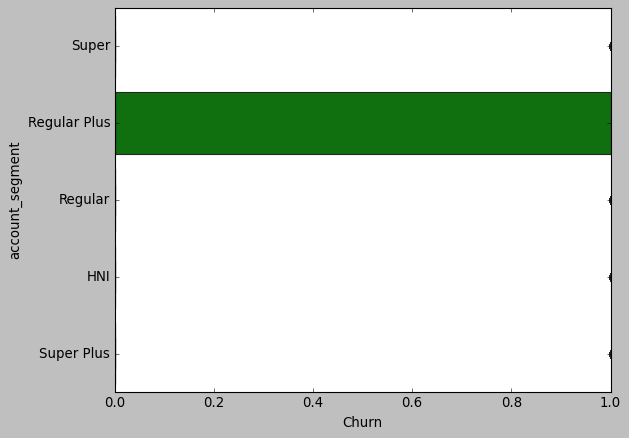

In [151]:
sns.boxplot(x="Churn", y='account_segment', data=df);

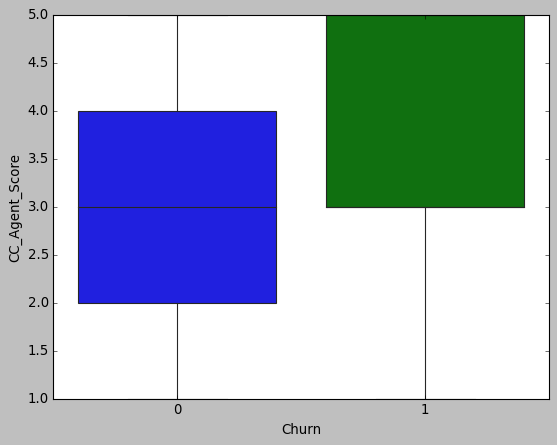

In [152]:
sns.boxplot(x="Churn", y='CC_Agent_Score', data=df);

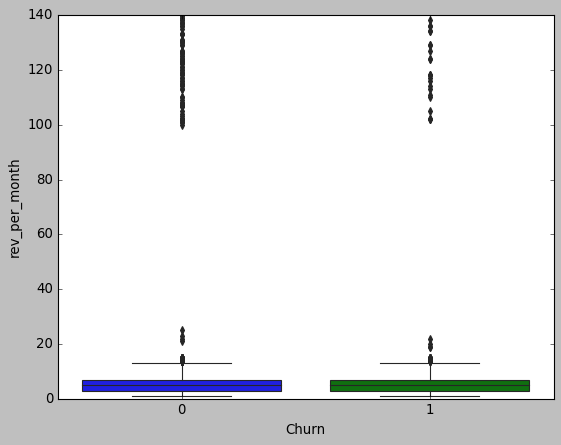

In [153]:
sns.boxplot(x="Churn", y='rev_per_month', data=df);

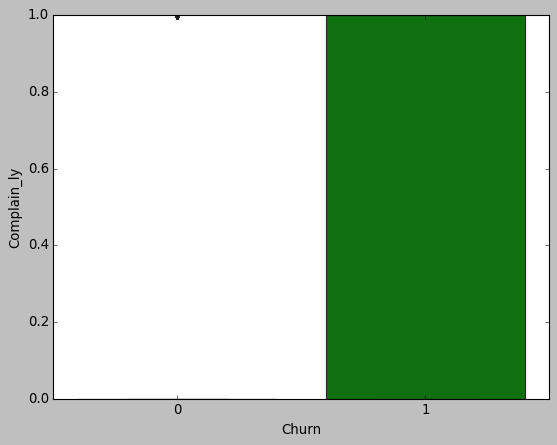

In [154]:
sns.boxplot(x="Churn", y='Complain_ly', data=df);

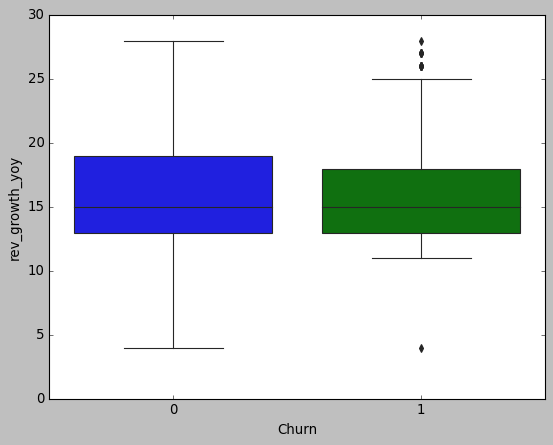

In [155]:
sns.boxplot(x="Churn", y='rev_growth_yoy', data=df);

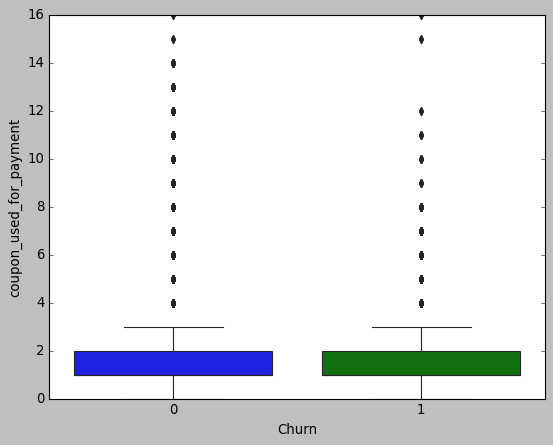

In [156]:
sns.boxplot(x="Churn", y='coupon_used_for_payment', data=df);

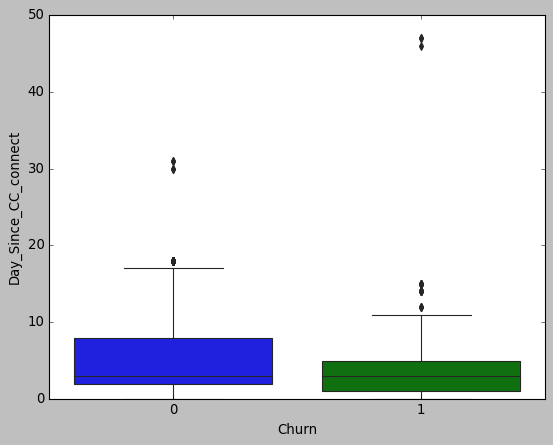

In [157]:
sns.boxplot(x="Churn", y='Day_Since_CC_connect', data=df);

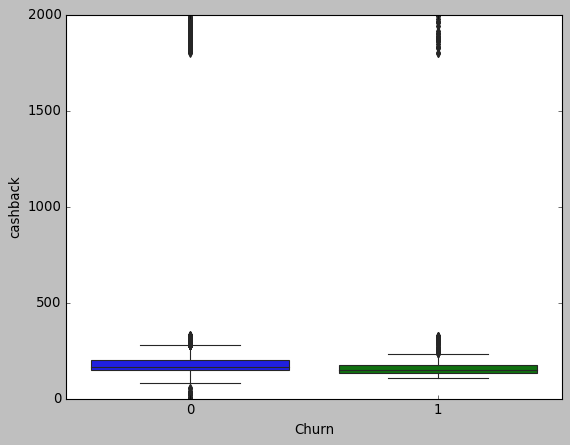

In [158]:
sns.boxplot(x="Churn", y='cashback', data=df);

In [159]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device', 'Noise_index',
       'Benefit_recevby_customer'],
      dtype='object')

## Multi Variate Analysis

<AxesSubplot:xlabel='City_Tier', ylabel='rev_per_month'>

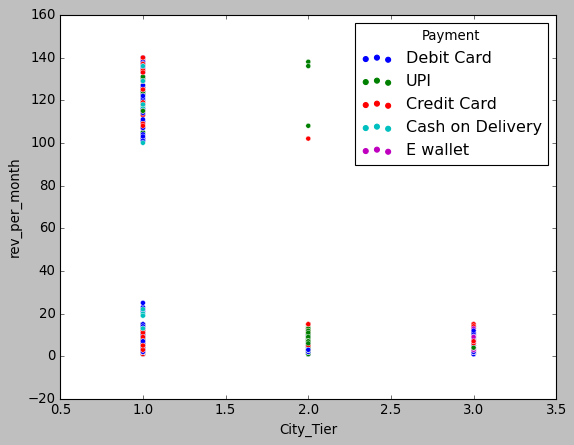

In [160]:
sns.scatterplot(data=df, x="City_Tier", y="rev_per_month", hue="Payment")

<AxesSubplot:xlabel='City_Tier', ylabel='rev_per_month'>

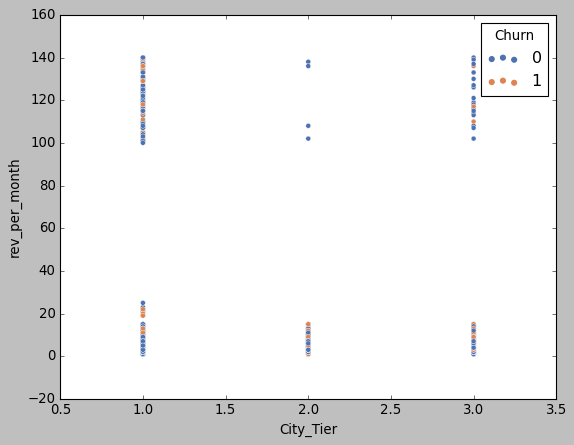

In [161]:
sns.scatterplot(data=df, x="City_Tier", y="rev_per_month", hue="Churn", palette='deep')

In [162]:
df.groupby(["Churn"])["rev_per_month","City_Tier"].mean()

,rev_per_month,City_Tier
Churn,,
0,6.153452,1.612951
1,6.831751,1.817511


In [163]:
df.groupby(["City_Tier"])["rev_per_month","Churn"].mean()

,rev_per_month,Churn
City_Tier,,
1.0,6.481888,0.145570
2.0,6.187500,0.200000
3.0,5.815163,0.213635


<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='rev_per_month'>

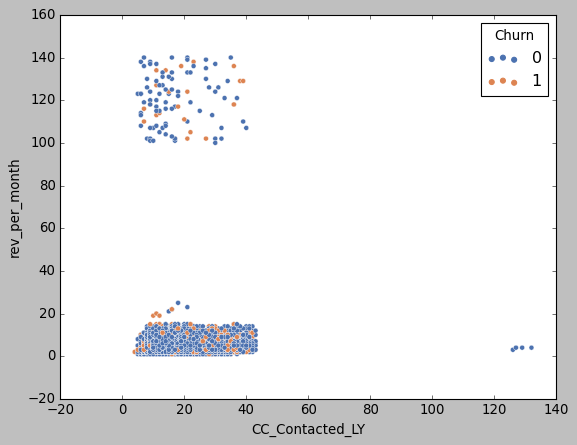

In [164]:
sns.scatterplot(data=df, x="CC_Contacted_LY", y="rev_per_month", hue="Churn", palette='deep')

In [165]:
# df.groupby(["account_segment", "Churn"])["Churn"].count()
df.groupby(["Churn"])["rev_per_month","CC_Contacted_LY"].mean()

,rev_per_month,CC_Contacted_LY
Churn,,
0,6.153452,17.563582
1,6.831751,19.254219


<AxesSubplot:xlabel='cashback', ylabel='rev_per_month'>

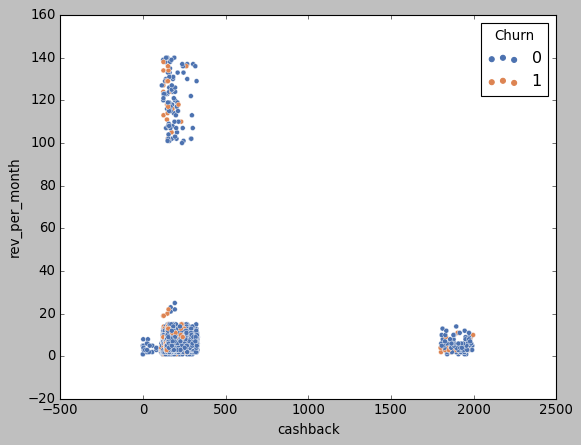

In [166]:
sns.scatterplot(data=df, x="cashback", y="rev_per_month", hue="Churn", palette='deep')

<AxesSubplot:xlabel='Benefit_recevby_customer', ylabel='Tenure'>

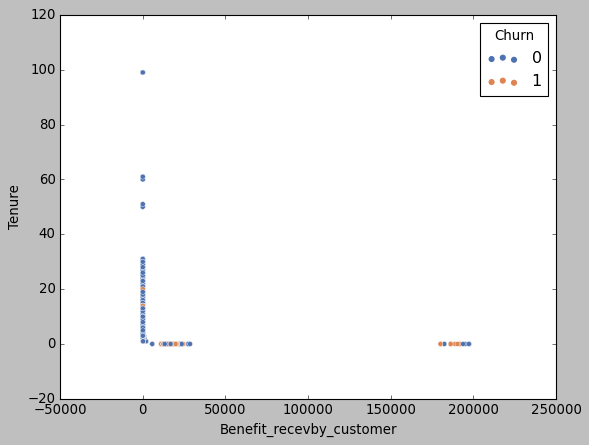

In [167]:
sns.scatterplot(data=df, x="Benefit_recevby_customer", y="Tenure", hue="Churn", palette='deep')

In [168]:
df.groupby(["Churn"])["cashback","rev_per_month"].mean()

,cashback,rev_per_month
Churn,,
0,197.062565,6.153452
1,182.113444,6.831751


In [169]:
df.groupby(["Churn"])["Benefit_recevby_customer","rev_per_month"].sum()

,Benefit_recevby_customer,rev_per_month
Churn,,
0,9.048079e+06,57584.0
1,1.096876e+07,12953.0


In [170]:
df.groupby(["Churn"])["rev_per_month", "Benefit_recevby_customer"].mean()

,rev_per_month,Benefit_recevby_customer
Churn,,
0,6.153452,966.881740
1,6.831751,5785.209681


<AxesSubplot:xlabel='Benefit_recevby_customer', ylabel='rev_per_month'>

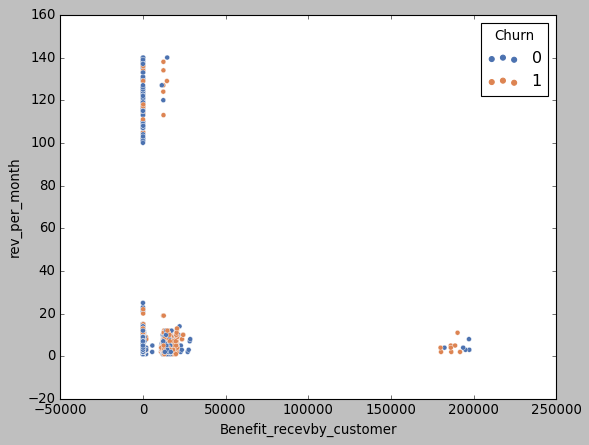

In [171]:
sns.scatterplot(data=df, x="Benefit_recevby_customer", y="rev_per_month", hue="Churn", palette='deep')

<AxesSubplot:xlabel='Service_Score', ylabel='rev_per_month'>

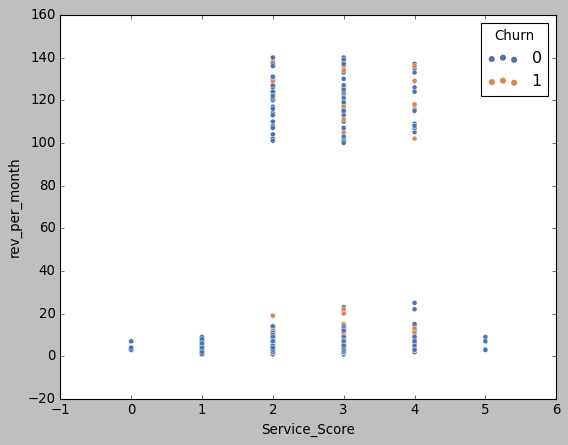

In [172]:
sns.scatterplot(data=df, x="Service_Score", y="rev_per_month", hue="Churn", palette='deep')

In [173]:
df.groupby(["Churn"])["Service_Score","rev_per_month"].mean()

,Service_Score,rev_per_month
Churn,,
0,2.900727,6.153452
1,2.917722,6.831751


In [174]:
df.groupby(["Service_Score"])["rev_per_month","Churn"].sum()

,rev_per_month,Churn
Service_Score,,
0.0,33.0,0
1.0,317.0,0
2.0,19475.0,550
3.0,34937.0,952
4.0,15750.0,394
5.0,25.0,0


In [175]:
df.groupby(["Service_Score"])["rev_per_month","Churn"].count()

,rev_per_month,Churn
Service_Score,,
0.0,8,8
1.0,77,77
2.0,3248,3248
3.0,5585,5585
4.0,2331,2331
5.0,5,5


<AxesSubplot:xlabel='Account_user_count', ylabel='rev_per_month'>

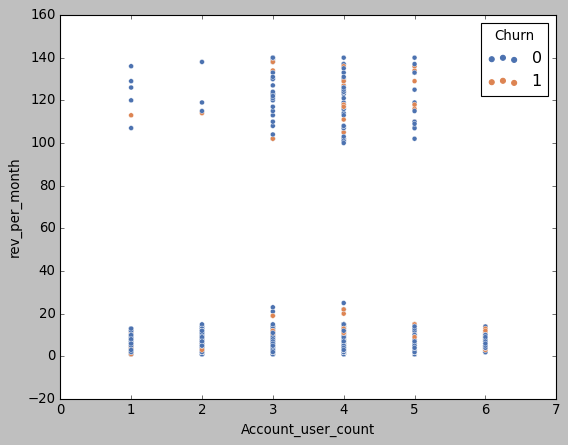

In [176]:
sns.scatterplot(data=df, x="Account_user_count", y="rev_per_month", hue="Churn", palette='deep')

In [177]:
df.groupby(["Account_user_count"])["Churn","rev_per_month"].mean()

,Churn,rev_per_month
Account_user_count,,
1.0,0.098876,6.139326
2.0,0.091255,6.401141
3.0,0.150000,5.796626
4.0,0.164471,6.401996
5.0,0.224971,6.762073
6.0,0.346032,6.301587


In [178]:
df.groupby(["Account_user_count"])["rev_per_month","cashback"].mean()

,rev_per_month,cashback
Account_user_count,,
1.0,6.139326,186.476292
2.0,6.401141,195.817852
3.0,5.796626,185.615460
4.0,6.401996,195.964501
5.0,6.762073,205.128233
6.0,6.301587,216.571873


In [319]:
df.groupby(["Account_user_count","Churn"])["rev_per_month"].mean()

Account_user_count  Churn
1.0                 0        6.014963
                    1        7.272727
2.0                 0        6.175732
                    1        8.645833
3.0                 0        5.823890
                    1        5.642127
4.0                 0        6.278070
                    1        7.031553
5.0                 0        6.432371
                    1        7.897906
6.0                 0        6.490291
                    1        5.944954
Name: rev_per_month, dtype: float64

<AxesSubplot:xlabel='CC_Agent_Score', ylabel='rev_per_month'>

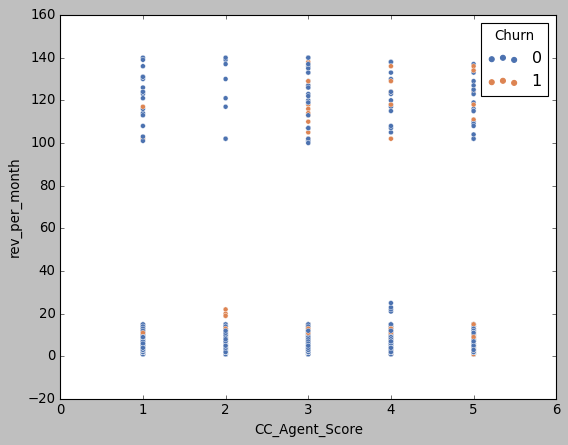

In [179]:
sns.scatterplot(data=df, x="CC_Agent_Score", y="rev_per_month", hue="Churn", palette='deep')

In [180]:
df.groupby(["Churn"])["CC_Agent_Score","rev_per_month"].mean()

,CC_Agent_Score,rev_per_month
Churn,,
0,3.001175,6.153452
1,3.386603,6.831751


<AxesSubplot:xlabel='rev_growth_yoy', ylabel='rev_per_month'>

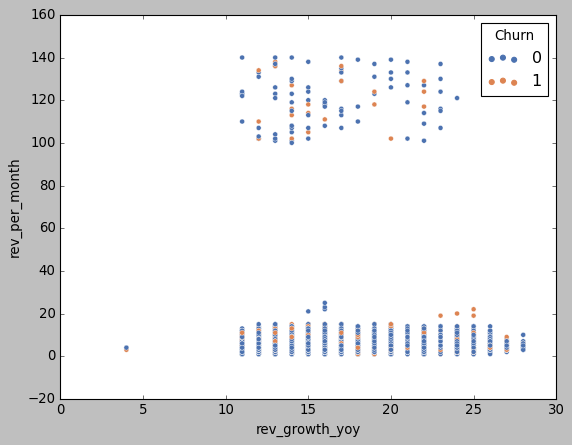

In [181]:
sns.scatterplot(data=df, x="rev_growth_yoy", y="rev_per_month", hue="Churn", palette='deep')

In [182]:
df.groupby(["Churn"])["rev_growth_yoy","rev_per_month"].mean()

,rev_growth_yoy,rev_per_month
Churn,,
0,16.215858,6.153452
1,16.077532,6.831751


<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='rev_per_month'>

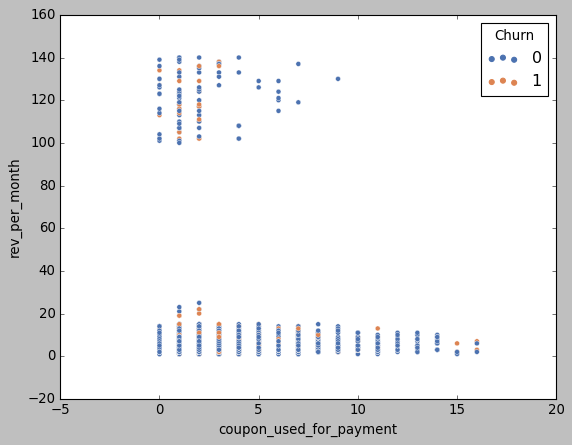

In [183]:
sns.scatterplot(data=df, x="coupon_used_for_payment", y="rev_per_month", hue="Churn", palette='deep')

<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='rev_per_month'>

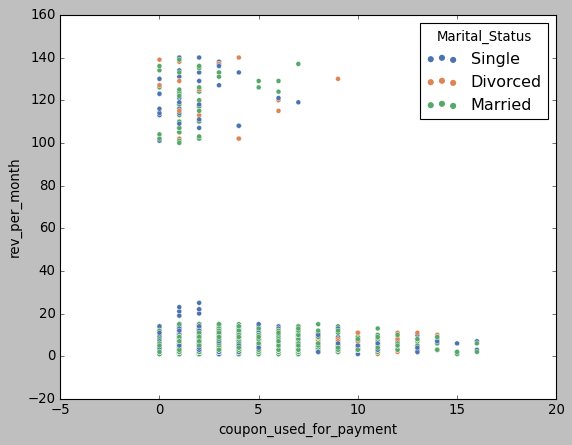

In [184]:
sns.scatterplot(data=df, x="coupon_used_for_payment", y="rev_per_month", hue="Marital_Status", palette='deep')

In [185]:
df.groupby(["Churn"])["coupon_used_for_payment","rev_per_month"].mean()

,coupon_used_for_payment,rev_per_month
Churn,,
0,1.803911,6.153452
1,1.725738,6.831751


<AxesSubplot:xlabel='Day_Since_CC_connect', ylabel='rev_per_month'>

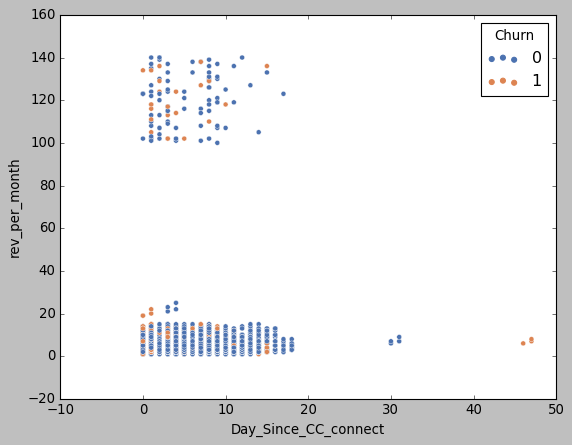

In [186]:
sns.scatterplot(data=df, x="Day_Since_CC_connect", y="rev_per_month", hue="Churn", palette='deep')

In [187]:
df.groupby(["Churn"])["Day_Since_CC_connect","rev_per_month"].mean()

,Day_Since_CC_connect,rev_per_month
Churn,,
0,4.820902,6.153452
1,3.401899,6.831751


<AxesSubplot:xlabel='Complain_ly', ylabel='rev_per_month'>

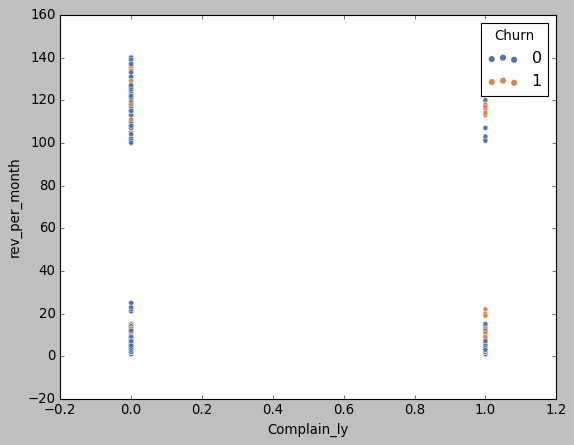

In [188]:
sns.scatterplot(data=df, x="Complain_ly", y="rev_per_month", hue="Churn", palette='deep')

In [189]:
df.groupby(["Churn"])["rev_per_month","Complain_ly"].sum()

,rev_per_month,Complain_ly
Churn,,
0,57584.0,2123.0
1,12953.0,988.0


In [314]:
df.groupby(["Complain_ly"])["rev_per_month","Churn"].sum()

,rev_per_month,Churn
Complain_ly,,
0.0,51042.0,908
1.0,19495.0,988


In [190]:
df['account_segment'].replace({'Regular' : 0 , 'Regular Plus' : 1, 'Super' : 2, 'Super Plus' : 3, 'HNI' : 4}, inplace = True)

In [191]:
# listings = pd.get_dummies(listings, columns=['Payment','host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy','Laptop_friendly_workspace','TV','Hot water','Family_friendly','Hair_dryer','Smoking_allowed','year'],drop_first=True)

df = pd.get_dummies(df, columns=['Payment', 'Gender', 'Marital_Status', 'Login_device'], drop_first=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountID                 11254 non-null  int64  
 1   Churn                     11254 non-null  int64  
 2   Tenure                    11254 non-null  float64
 3   City_Tier                 11254 non-null  float64
 4   CC_Contacted_LY           11254 non-null  float64
 5   Service_Score             11254 non-null  float64
 6   Account_user_count        11254 non-null  float64
 7   account_segment           11254 non-null  int64  
 8   CC_Agent_Score            11254 non-null  float64
 9   rev_per_month             11254 non-null  float64
 10  Complain_ly               11254 non-null  float64
 11  rev_growth_yoy            11254 non-null  float64
 12  coupon_used_for_payment   11254 non-null  float64
 13  Day_Since_CC_connect      11254 non-null  float64
 14  cashba

# As we can see that our data is ready for model building and churn predection as all the anomlies of data cleaned completely and their is no object type data set left

In [193]:
# Copy all the predictor variables into X dataframe
X = df.drop('Churn', axis=1)

# Copy target into the y dataframe.  
y = df['Churn']

In [194]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [195]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'none', solver = 'newton-cg')
lr = lr.fit(X_train, y_train)

In [196]:
from sklearn import metrics

In [197]:
y_train_predict = lr.predict(X_train)
model_score_lr_train = lr.score(X_train, y_train)
print(model_score_lr_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8791418052558081
[[6359  191]
 [ 761  566]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6550
           1       0.75      0.43      0.54      1327

    accuracy                           0.88      7877
   macro avg       0.82      0.70      0.74      7877
weighted avg       0.87      0.88      0.87      7877



In [198]:
y_test_predict = lr.predict(X_test)
model_score_lr_test = lr.score(X_test, y_test)
print(model_score_lr_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8726680485638141
[[2707  101]
 [ 329  240]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2808
           1       0.70      0.42      0.53       569

    accuracy                           0.87      3377
   macro avg       0.80      0.69      0.73      3377
weighted avg       0.86      0.87      0.86      3377



In [199]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression Model 2 with grid search CV

In [200]:
import statsmodels.formula.api as SM
parameter={'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,10,20,30,40,50,60,70], 'max_iter':[100,200,300]}

In [201]:
GridSearch_lr=GridSearchCV(lr,param_grid=parameter,scoring='accuracy',cv=5)

In [202]:
GridSearch_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='none', solver='newton-cg'),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [203]:
print(GridSearch_lr.best_params_)

{'C': 40, 'max_iter': 100, 'penalty': 'l2'}


In [204]:
print(GridSearch_lr.best_score_)

0.8790142615421803


In [205]:
lr_3 = LogisticRegression(solver = 'newton-cg',C=40, max_iter=100, penalty='l2',class_weight='balanced')
lr_3 = lr.fit(X_train, y_train)

In [206]:
y_train_predict = lr_3.predict(X_train)
model_score_lr_train = lr_3.score(X_train, y_train)
print(model_score_lr_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8791418052558081
[[6359  191]
 [ 761  566]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6550
           1       0.75      0.43      0.54      1327

    accuracy                           0.88      7877
   macro avg       0.82      0.70      0.74      7877
weighted avg       0.87      0.88      0.87      7877



In [207]:
y_test_predict = lr_3.predict(X_test)
model_score_lr_test = lr_3.score(X_test, y_test)
print(model_score_lr_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8726680485638141
[[2707  101]
 [ 329  240]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2808
           1       0.70      0.42      0.53       569

    accuracy                           0.87      3377
   macro avg       0.80      0.69      0.73      3377
weighted avg       0.86      0.87      0.86      3377



In [208]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Noise_index', 'Benefit_recevby_customer', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile'],
      dtype='object')

In [209]:
f_1 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+CC_Agent_Score+rev_per_month+Complain_ly+rev_growth_yoy+coupon_used_for_payment+Day_Since_CC_connect+cashback+Noise_index+Benefit_recevby_customer'

In [210]:
model_1 = SM.logit(formula=f_1,data=df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.330755
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11238
Method:                           MLE   Df Model:                           15
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2706
Time:                        11:48:04   Log-Likelihood:                -3722.3
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.6363      0.238    -19.476      0.000      -5.103      -4.170
Tenure                      -0.0864      0.005    -16.921      0.000      -0.096      -0.076
City_Tier                    0.2971      0.032      9.180      0.000       0.234       0.361
CC_Contacted_LY              0.0124      0.004      3.470      0.001       0.005       0.019
Service_Score                0.1602      0.047      3.391      0.001       0.068       0.253
Account_user_count           0.4239      0.033     12.693      0.000       0.358       0.489
account_segment             -0.1626      0.033     -4.882      0.000      -0.228      -0.097
CC_Agent_Score               0.2629      0.022     11.833      0.000       0.219       0.306
rev_per_month                0.0096      0.002      4.415      0.000       0.005       0.014
Complain_ly                  1.4755      0.061     24.094      0.000       1.356       1.596
rev_growth_yoy              -0.0204      0.008     -2.532      0.011      -0.036      -0.005
coupon_used_for_payment      0.1284      0.017      7.626      0.000       0.095       0.161
Day_Since_CC_connect        -0.0956      0.011     -8.830      0.000      -0.117      -0.074
cashback                    -0.0002      0.000     -0.977      0.328      -0.001       0.000
Noise_index                  0.0007   5.71e-05     12.061      0.000       0.001       0.001
Benefit_recevby_customer  1.565e-05   5.25e-06      2.980      0.003    5.36e-06    2.59e-05
============================================================================================
"""

In [211]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.26765265561811946


In [212]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [213]:
vif_cal(input_data=df[['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Noise_index', 'Benefit_recevby_customer']])

Churn  VIF =  1.31
Tenure  VIF =  1.14
City_Tier  VIF =  1.04
CC_Contacted_LY  VIF =  1.06
Service_Score  VIF =  1.21
Account_user_count  VIF =  1.15
account_segment  VIF =  1.13
CC_Agent_Score  VIF =  1.02
rev_per_month  VIF =  1.01
Complain_ly  VIF =  1.07
rev_growth_yoy  VIF =  1.02
coupon_used_for_payment  VIF =  1.2
Day_Since_CC_connect  VIF =  1.22
cashback  VIF =  1.14
Noise_index  VIF =  1.88
Benefit_recevby_customer  VIF =  1.72


In [214]:
f_2 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+CC_Agent_Score+rev_per_month+Complain_ly+rev_growth_yoy+coupon_used_for_payment+Day_Since_CC_connect+cashback+Noise_index'

In [215]:
model_2 = SM.logit(formula=f_2,data=df).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.331281
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11239
Method:                           MLE   Df Model:                           14
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2694
Time:                        11:48:05   Log-Likelihood:                -3728.2
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.5725      0.237    -19.316      0.000      -5.036      -4.109
Tenure                     -0.0886      0.005    -17.456      0.000      -0.099      -0.079
City_Tier                   0.2932      0.032      9.074      0.000       0.230       0.356
CC_Contacted_LY             0.0107      0.004      2.998      0.003       0.004       0.018
Service_Score               0.1473      0.047      3.131      0.002       0.055       0.239
Account_user_count          0.4197      0.033     12.587      0.000       0.354       0.485
account_segment            -0.1621      0.033     -4.885      0.000      -0.227      -0.097
CC_Agent_Score              0.2629      0.022     11.846      0.000       0.219       0.306
rev_per_month               0.0095      0.002      4.402      0.000       0.005       0.014
Complain_ly                 1.4771      0.061     24.153      0.000       1.357       1.597
rev_growth_yoy             -0.0201      0.008     -2.495      0.013      -0.036      -0.004
coupon_used_for_payment     0.1282      0.017      7.623      0.000       0.095       0.161
Day_Since_CC_connect       -0.0962      0.011     -8.898      0.000      -0.117      -0.075
cashback                 7.863e-05      0.000      0.473      0.636      -0.000       0.000
Noise_index                 0.0008   4.64e-05     17.063      0.000       0.001       0.001
===========================================================================================
"""

In [216]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.26668985324397354


In [217]:
# Model 3- removing Noise Index

In [218]:
f_3 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+CC_Agent_Score+rev_per_month+Complain_ly+rev_growth_yoy+coupon_used_for_payment+Day_Since_CC_connect+cashback'

In [219]:
model_3 = SM.logit(formula=f_3,data=df).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.345549
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11240
Method:                           MLE   Df Model:                           13
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2380
Time:                        11:48:05   Log-Likelihood:                -3888.8
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.2148      0.214    -14.996      0.000      -3.635      -2.795
Tenure                     -0.1249      0.005    -24.945      0.000      -0.135      -0.115
City_Tier                   0.2860      0.031      9.109      0.000       0.224       0.348
CC_Contacted_LY             0.0251      0.003      7.782      0.000       0.019       0.031
Service_Score              -0.0935      0.044     -2.150      0.032      -0.179      -0.008
Account_user_count          0.3279      0.032     10.357      0.000       0.266       0.390
account_segment            -0.1826      0.033     -5.511      0.000      -0.248      -0.118
CC_Agent_Score              0.2648      0.022     12.283      0.000       0.223       0.307
rev_per_month               0.0087      0.002      4.000      0.000       0.004       0.013
Complain_ly                 1.4811      0.059     24.933      0.000       1.365       1.597
rev_growth_yoy             -0.0188      0.008     -2.398      0.016      -0.034      -0.003
coupon_used_for_payment     0.1173      0.017      6.923      0.000       0.084       0.151
Day_Since_CC_connect       -0.1014      0.011     -9.522      0.000      -0.122      -0.081
cashback                 8.421e-05      0.000      0.525      0.599      -0.000       0.000
===========================================================================================
"""

In [220]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.23541982646155413


In [221]:
# removing cashback

In [222]:
f_4 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+CC_Agent_Score+rev_per_month+Complain_ly+rev_growth_yoy+coupon_used_for_payment+Day_Since_CC_connect+Noise_index'

In [223]:
model_4 = SM.logit(formula=f_4,data=df).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.331291
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11240
Method:                           MLE   Df Model:                           13
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2694
Time:                        11:48:06   Log-Likelihood:                -3728.3
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.5632      0.236    -19.347      0.000      -5.025      -4.101
Tenure                     -0.0885      0.005    -17.459      0.000      -0.098      -0.079
City_Tier                   0.2934      0.032      9.081      0.000       0.230       0.357
CC_Contacted_LY             0.0106      0.004      2.993      0.003       0.004       0.018
Service_Score               0.1478      0.047      3.144      0.002       0.056       0.240
Account_user_count          0.4200      0.033     12.598      0.000       0.355       0.485
account_segment            -0.1611      0.033     -4.862      0.000      -0.226      -0.096
CC_Agent_Score              0.2628      0.022     11.840      0.000       0.219       0.306
rev_per_month               0.0095      0.002      4.399      0.000       0.005       0.014
Complain_ly                 1.4772      0.061     24.156      0.000       1.357       1.597
rev_growth_yoy             -0.0201      0.008     -2.497      0.013      -0.036      -0.004
coupon_used_for_payment     0.1284      0.017      7.636      0.000       0.095       0.161
Day_Since_CC_connect       -0.0961      0.011     -8.890      0.000      -0.117      -0.075
Noise_index                 0.0008   4.64e-05     17.064      0.000       0.001       0.001
===========================================================================================
"""

In [224]:
print('The adjusted pseudo R-square value is',1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.2668642543558907


In [225]:
# removing revenue growth yoy

In [226]:
f_5 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+CC_Agent_Score+rev_per_month+Complain_ly+coupon_used_for_payment+Day_Since_CC_connect+Noise_index'

In [227]:
model_5 = SM.logit(formula=f_5,data=df).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.331570
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11241
Method:                           MLE   Df Model:                           12
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2688
Time:                        11:48:06   Log-Likelihood:                -3731.5
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.8352      0.210    -23.032      0.000      -5.247      -4.424
Tenure                     -0.0885      0.005    -17.488      0.000      -0.098      -0.079
City_Tier                   0.2943      0.032      9.122      0.000       0.231       0.358
CC_Contacted_LY             0.0099      0.004      2.791      0.005       0.003       0.017
Service_Score               0.1386      0.047      2.956      0.003       0.047       0.230
Account_user_count          0.4160      0.033     12.510      0.000       0.351       0.481
account_segment            -0.1588      0.033     -4.798      0.000      -0.224      -0.094
CC_Agent_Score              0.2627      0.022     11.845      0.000       0.219       0.306
rev_per_month               0.0094      0.002      4.353      0.000       0.005       0.014
Complain_ly                 1.4764      0.061     24.153      0.000       1.357       1.596
coupon_used_for_payment     0.1289      0.017      7.658      0.000       0.096       0.162
Day_Since_CC_connect       -0.0964      0.011     -8.907      0.000      -0.118      -0.075
Noise_index                 0.0008   4.64e-05     17.058      0.000       0.001       0.001
===========================================================================================
"""

In [228]:
print('The adjusted pseudo R-square value is',1 - ((model_5.llf - model_5.df_model)/model_5.llnull))

The adjusted pseudo R-square value is 0.2664436232384869


In [229]:
# removing CC_agent_score

In [230]:
f_6 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+rev_per_month+Complain_ly+coupon_used_for_payment+Day_Since_CC_connect+Noise_index'

In [231]:
model_6 = SM.logit(formula=f_6,data=df).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.338036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11242
Method:                           MLE   Df Model:                           11
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2545
Time:                        11:48:07   Log-Likelihood:                -3804.3
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.0122      0.194    -20.679      0.000      -4.392      -3.632
Tenure                     -0.0892      0.005    -17.611      0.000      -0.099      -0.079
City_Tier                   0.2787      0.032      8.724      0.000       0.216       0.341
CC_Contacted_LY             0.0105      0.003      3.032      0.002       0.004       0.017
Service_Score               0.1675      0.046      3.617      0.000       0.077       0.258
Account_user_count          0.4029      0.033     12.248      0.000       0.338       0.467
account_segment            -0.1521      0.033     -4.638      0.000      -0.216      -0.088
rev_per_month               0.0098      0.002      4.598      0.000       0.006       0.014
Complain_ly                 1.4145      0.060     23.555      0.000       1.297       1.532
coupon_used_for_payment     0.1274      0.017      7.628      0.000       0.095       0.160
Day_Since_CC_connect       -0.0933      0.011     -8.703      0.000      -0.114      -0.072
Noise_index                 0.0008   4.59e-05     17.345      0.000       0.001       0.001
===========================================================================================
"""

In [232]:
print('The adjusted pseudo R-square value is',1 - ((model_6.llf - model_6.df_model)/model_6.llnull))

The adjusted pseudo R-square value is 0.25238099498448474


In [233]:
# remving coupon used for payment

In [234]:
f_7 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+account_segment+CC_Agent_Score+rev_per_month+Complain_ly+Day_Since_CC_connect+Noise_index'

In [235]:
model_7 = SM.logit(formula=f_7,data=df).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.334001
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11242
Method:                           MLE   Df Model:                           11
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2634
Time:                        11:48:07   Log-Likelihood:                -3758.8
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.9065      0.209    -23.454      0.000      -5.316      -4.496
Tenure                  -0.0858      0.005    -17.073      0.000      -0.096      -0.076
City_Tier                0.2912      0.032      9.062      0.000       0.228       0.354
CC_Contacted_LY          0.0092      0.004      2.604      0.009       0.002       0.016
Service_Score            0.1746      0.046      3.756      0.000       0.083       0.266
Account_user_count       0.4351      0.033     13.143      0.000       0.370       0.500
account_segment         -0.1412      0.033     -4.274      0.000      -0.206      -0.076
CC_Agent_Score           0.2611      0.022     11.819      0.000       0.218       0.304
rev_per_month            0.0092      0.002      4.260      0.000       0.005       0.013
Complain_ly              1.4798      0.061     24.292      0.000       1.360       1.599
Day_Since_CC_connect    -0.0716      0.010     -7.068      0.000      -0.091      -0.052
Noise_index              0.0008   4.63e-05     16.805      0.000       0.001       0.001
========================================================================================
"""

In [236]:
print('The adjusted pseudo R-square value is',1 - ((model_7.llf - model_7.df_model)/model_7.llnull))

The adjusted pseudo R-square value is 0.2612794029684792


In [237]:
f_8 = 'Churn~ Tenure+City_Tier+CC_Contacted_LY+Service_Score+Account_user_count+CC_Agent_Score+rev_per_month+Complain_ly+Day_Since_CC_connect+Noise_index'

In [238]:
model_8 = SM.logit(formula=f_8,data=df).fit()
model_8.summary()

Optimization terminated successfully.
         Current function value: 0.334827
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11254
Model:                          Logit   Df Residuals:                    11243
Method:                           MLE   Df Model:                           10
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2616
Time:                        11:48:07   Log-Likelihood:                -3768.1
converged:                       True   LL-Null:                       -5103.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0125      0.207    -24.169      0.000      -5.419      -4.606
Tenure                  -0.0895      0.005    -17.913      0.000      -0.099      -0.080
City_Tier                0.2592      0.031      8.320      0.000       0.198       0.320
CC_Contacted_LY          0.0073      0.004      2.061      0.039       0.000       0.014
Service_Score            0.1815      0.046      3.917      0.000       0.091       0.272
Account_user_count       0.4361      0.033     13.196      0.000       0.371       0.501
CC_Agent_Score           0.2589      0.022     11.747      0.000       0.216       0.302
rev_per_month            0.0090      0.002      4.164      0.000       0.005       0.013
Complain_ly              1.4688      0.061     24.195      0.000       1.350       1.588
Day_Since_CC_connect    -0.0824      0.010     -8.373      0.000      -0.102      -0.063
Noise_index              0.0008   4.63e-05     16.959      0.000       0.001       0.001
========================================================================================
"""

In [239]:
print('The adjusted pseudo R-square value is',1 - ((model_8.llf - model_8.df_model)/model_8.llnull))

The adjusted pseudo R-square value is 0.259653672167655


In [240]:
# Prediction on the Data
# Now, let us see the predicted probability values.

# There are probabilities of an individual going to Default

In [241]:
Train,Test = train_test_split(df,test_size=0.3,random_state=10,stratify=df['Churn'])

In [242]:
# parameter_4={'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,10,20,30,40,50,60,70], 'max_iter':[100,200,300]}

In [243]:
# GridSearch_lr_4=GridSearchCV(lr,param_grid=parameter_4,scoring='accuracy',cv=5)

In [244]:
# GridSearch_lr.fit(X_train, y_train)

In [245]:
model_sklearn_4 = lr_3.fit(Train[[ 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Noise_index', 'Benefit_recevby_customer']],Train['Churn'])

In [246]:
# Predicting on the Training Data

model_sklearn_4_pred_train = model_sklearn_4.predict(Train[[ 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Noise_index', 'Benefit_recevby_customer']])

In [247]:
# Predicting on the Test Data

model_sklearn_4_pred_test = model_sklearn_4.predict(Test[[ 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Noise_index', 'Benefit_recevby_customer']])

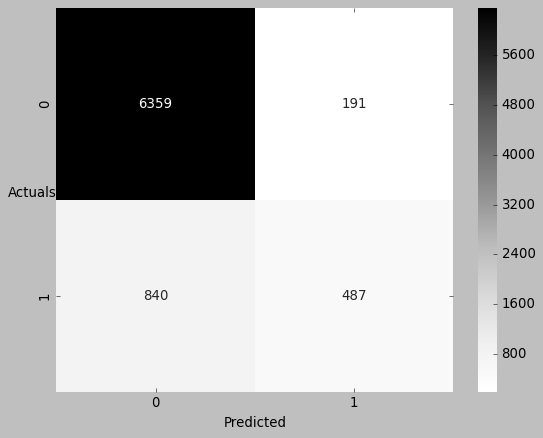

In [248]:
sns.heatmap((metrics.confusion_matrix(Train['Churn'],model_sklearn_4_pred_train)),annot=True,fmt='.5g'
            ,cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [249]:
print('Accuracy Score - Model 4')
print('Training:', metrics.accuracy_score(Train['Churn'],model_sklearn_4_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Churn'],model_sklearn_4_pred_test))

Accuracy Score - Model 4
Training: 0.8691126063222039
Testing:  0.8750370151021617


## Random Forest

## Rando Forest Model 1

In [250]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [251]:
y_train_predict = rfcl.predict(X_train)
model_score_rf_train = rfcl.score(X_train, y_train)
print(model_score_rf_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6550    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877



In [252]:
y_test_predict = rfcl.predict(X_test)
model_score_rf_test = rfcl.score(X_test, y_test)
print(model_score_rf_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9588392063962097
[[2771   37]
 [ 102  467]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2808
           1       0.93      0.82      0.87       569

    accuracy                           0.96      3377
   macro avg       0.95      0.90      0.92      3377
weighted avg       0.96      0.96      0.96      3377



In [253]:
rfcl.score(X_train,y_train)

1.0

In [254]:
rfcl.score(X_test,y_test)

0.9588392063962097

In [255]:
y_train_pred = rfcl.predict(X_train)
y_test_pred = rfcl.predict(X_test)

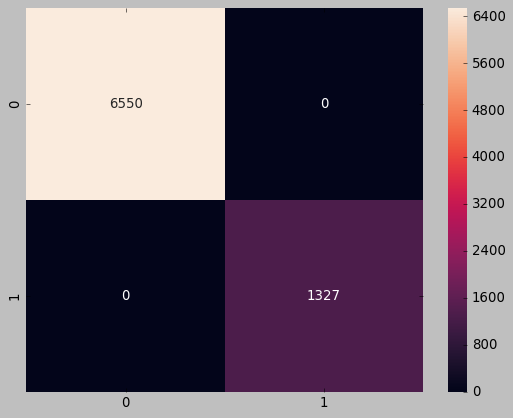

In [256]:
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True,fmt='.4g');

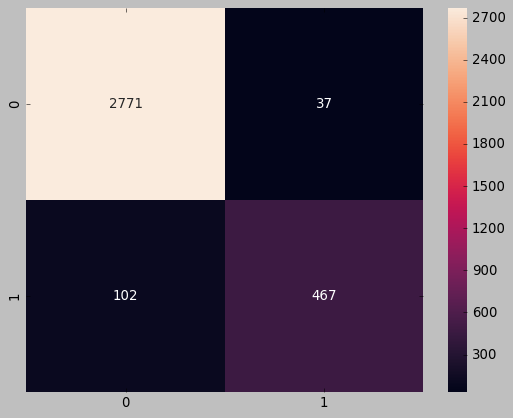

In [257]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='.4g');

## Random Forest Model 2

In [258]:
rfcl = RandomForestClassifier(n_estimators = 301,random_state=0)

In [317]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'max_features': [4, 6, 8],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [30, 50],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 2, scoring='accuracy')

In [318]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [30, 50],
                         'n_estimators': [301, 501]},
             scoring='accuracy')

In [261]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 30,
 'n_estimators': 301}

In [262]:
rfcl_gc = RandomForestClassifier(n_estimators=301,
    criterion='gini',
    max_depth=7,
    max_features=6,
    min_samples_split=30,
    min_samples_leaf=50,random_state=0)
rfcl_gc = rfcl.fit(X_train, y_train)

In [263]:
y_train_predict = rfcl_gc.predict(X_train)
model_score = rfcl_gc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6550    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877



In [264]:
y_test_predict = rfcl_gc.predict(X_test)
model_score = rfcl_gc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9576547231270358
[[2770   38]
 [ 105  464]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2808
           1       0.92      0.82      0.87       569

    accuracy                           0.96      3377
   macro avg       0.94      0.90      0.92      3377
weighted avg       0.96      0.96      0.96      3377



## Adaboost clasifier model

In [265]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=501,random_state=0)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=501, random_state=0)

In [266]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score_ADB_train = ADB_model.score(X_train, y_train)
print(model_score_ADB_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9115145359908594
[[6322  228]
 [ 469  858]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6550
           1       0.79      0.65      0.71      1327

    accuracy                           0.91      7877
   macro avg       0.86      0.81      0.83      7877
weighted avg       0.91      0.91      0.91      7877



In [267]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score_ADB_test = ADB_model.score(X_test, y_test)
print(model_score_ADB_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_http://localhost:8888/notebooks/capstone%20pre.ipynb#Gradient-boosting-clasifiertest_predict))

0.8925081433224755
[[2680  128]
 [ 235  334]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2808
           1       0.72      0.59      0.65       569

    accuracy                           0.89      3377
   macro avg       0.82      0.77      0.79      3377
weighted avg       0.89      0.89      0.89      3377



## Gradient boosting clasifier

In [268]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [269]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score_gb_train = gbcl.score(X_train, y_train)
print(model_score_gb_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9201472641868732
[[6390  160]
 [ 469  858]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6550
           1       0.84      0.65      0.73      1327

    accuracy                           0.92      7877
   macro avg       0.89      0.81      0.84      7877
weighted avg       0.92      0.92      0.92      7877



In [270]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score_gb_test = gbcl.score(X_test, y_test)
print(model_score_gb_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9087947882736156
[[2709   99]
 [ 209  360]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2808
           1       0.78      0.63      0.70       569

    accuracy                           0.91      3377
   macro avg       0.86      0.80      0.82      3377
weighted avg       0.90      0.91      0.90      3377



## KNN Classifier

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [272]:
KNN_model=KNeighborsClassifier(1)

In [273]:
KNN_model.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [274]:
# Performance Matrix on the train data
y_train_predict = KNN_model.predict(X_train_s)
model_score_knn_train = KNN_model.score(X_train_s,y_train)
print(model_score_knn_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6550    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877



In [275]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_s)
model_score_knn_test = KNN_model.score(X_test_s, y_test)
print(model_score_knn_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9535090316849274
[[2735   73]
 [  84  485]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2808
           1       0.87      0.85      0.86       569

    accuracy                           0.95      3377
   macro avg       0.92      0.91      0.92      3377
weighted avg       0.95      0.95      0.95      3377



## KNN Clasifier Model 2

In [276]:
# Analyze the n_neighbors parameter in KNN

# When k is too small - overfit

# When k is too big - underfit


ac_scores_train = []

ac_scores_test = []


for k in range(1,30,2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_s,y_train)

  # Evaluate train accuracy
  score1 = knn.score(X_train_s,y_train)
  ac_scores_train.append(score1)

  # Evaluate test accuracy
  score2 = knn.score(X_test_s,y_test)
  ac_scores_test.append(score2)

In [277]:
print(ac_scores_train)
print(ac_scores_test)

[1.0, 0.9794337945918496, 0.9596293004951123, 0.9374127205789006, 0.9226863018915831, 0.9084676907452076, 0.8975498286149549, 0.8905674749270026, 0.8863780627142313, 0.8812999873048115, 0.8792687571410436, 0.8769836232068047, 0.8750793449282722, 0.8735559223054462, 0.8722864034530913]
[0.9535090316849274, 0.9410719573586023, 0.9256736748593426, 0.916790050340539, 0.9049452176488008, 0.8936926265916494, 0.8886585726976607, 0.8839206396209653, 0.8771098608232158, 0.8759253775540421, 0.8729641693811075, 0.8711874444773468, 0.8705952028427598, 0.8694107195735861, 0.8691145987562926]


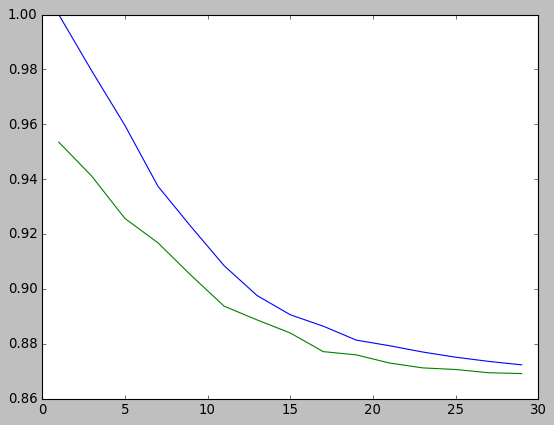

In [278]:
plt.plot(range(1,30,2) , ac_scores_train)
plt.plot(range(1,30,2) , ac_scores_test)

In [279]:
KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=15)

In [280]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_s)
model_score = KNN_model.score(X_train_s, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8905674749270026
[[6455   95]
 [ 767  560]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6550
           1       0.85      0.42      0.57      1327

    accuracy                           0.89      7877
   macro avg       0.87      0.70      0.75      7877
weighted avg       0.89      0.89      0.87      7877



In [281]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_s)
model_score = KNN_model.score(X_test_s, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8839206396209653
[[2758   50]
 [ 342  227]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.82      0.40      0.54       569

    accuracy                           0.88      3377
   macro avg       0.85      0.69      0.74      3377
weighted avg       0.88      0.88      0.87      3377



## KNN Classifier Model 3

In [282]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

In [283]:
param_grid = {
    'n_neighbors' : range(6,21,3),
    'p' : [1,2,3]
}

In [284]:
grid_knn = GridSearchCV(KNeighborsClassifier() , param_grid=param_grid , refit = True , verbose = 3,cv=3,scoring='accuracy')

In [285]:
grid_knn.fit(X_train_s,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ................n_neighbors=6, p=1;, score=0.890 total time=   0.4s
[CV 2/3] END ................n_neighbors=6, p=1;, score=0.900 total time=   0.4s
[CV 3/3] END ................n_neighbors=6, p=1;, score=0.886 total time=   0.5s
[CV 1/3] END ................n_neighbors=6, p=2;, score=0.880 total time=   0.2s
[CV 2/3] END ................n_neighbors=6, p=2;, score=0.889 total time=   0.3s
[CV 3/3] END ................n_neighbors=6, p=2;, score=0.882 total time=   0.2s
[CV 1/3] END ................n_neighbors=6, p=3;, score=0.878 total time=   6.9s
[CV 2/3] END ................n_neighbors=6, p=3;, score=0.881 total time=   7.1s
[CV 3/3] END ................n_neighbors=6, p=3;, score=0.876 total time=   5.9s
[CV 1/3] END ................n_neighbors=9, p=1;, score=0.882 total time=   0.4s
[CV 2/3] END ................n_neighbors=9, p=1;, score=0.893 total time=   0.5s
[CV 3/3] END ................n_neighbors=9, p=1;

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(6, 21, 3), 'p': [1, 2, 3]},
             scoring='accuracy', verbose=3)

In [286]:
grid_knn.best_params_

{'n_neighbors': 6, 'p': 1}

In [287]:
KNN_model=KNeighborsClassifier(n_neighbors=6, p=1)
KNN_model.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [288]:
y_train_predict = KNN_model.predict(X_train_s)
model_score = KNN_model.score(X_train_s, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9497270534467437
[[6532   18]
 [ 378  949]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6550
           1       0.98      0.72      0.83      1327

    accuracy                           0.95      7877
   macro avg       0.96      0.86      0.90      7877
weighted avg       0.95      0.95      0.95      7877



In [289]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_s)
model_score = KNN_model.score(X_test_s, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.923304708320995
[[2779   29]
 [ 230  339]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2808
           1       0.92      0.60      0.72       569

    accuracy                           0.92      3377
   macro avg       0.92      0.79      0.84      3377
weighted avg       0.92      0.92      0.92      3377



## Decesion Tree

In [290]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [291]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=1)

In [292]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [293]:
## Performance Matrix on train data set
y_train_predict = dt_model.predict(X_train)
model_score = dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6550    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877



In [294]:
## Performance Matrix on test data set
y_test_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9312999703879182
[[2692  116]
 [ 116  453]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2808
           1       0.80      0.80      0.80       569

    accuracy                           0.93      3377
   macro avg       0.88      0.88      0.88      3377
weighted avg       0.93      0.93      0.93      3377



In [295]:
reg_dt_model = DecisionTreeClassifier(criterion='gini', random_state=1,min_samples_split=100, min_samples_leaf=30)

In [296]:
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=30, min_samples_split=100,
                       random_state=1)

In [297]:
## Performance Matrix on train data set
y_train_predict = reg_dt_model.predict(X_train)
model_score = reg_dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9009775295163133
[[6361  189]
 [ 591  736]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6550
           1       0.80      0.55      0.65      1327

    accuracy                           0.90      7877
   macro avg       0.86      0.76      0.80      7877
weighted avg       0.89      0.90      0.89      7877



In [298]:
## Performance Matrix on test data set
y_test_predict = reg_dt_model.predict(X_test)
model_score = reg_dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.892804264139769
[[2714   94]
 [ 268  301]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2808
           1       0.76      0.53      0.62       569

    accuracy                           0.89      3377
   macro avg       0.84      0.75      0.78      3377
weighted avg       0.89      0.89      0.88      3377



## Decesion Tree Model 3

In [299]:
from sklearn.model_selection import GridSearchCV

In [300]:
parameters = {'max_depth' : [2,5,7,9,11,13],
              'min_samples_split' : [25,50,100,200,300],
              'min_samples_leaf' : [25,50,100,200,400],
              'criterion' : ['gini', 'entropy']}

In [301]:
dt_model_f = DecisionTreeClassifier(random_state=1)

In [302]:
gs = GridSearchCV(dt_model_f, param_grid = parameters ,scoring='recall',cv=5)

In [303]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 9, 11, 13],
                         'min_samples_leaf': [25, 50, 100, 200, 400],
                         'min_samples_split': [25, 50, 100, 200, 300]},
             scoring='recall')

In [304]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 25,
 'min_samples_split': 300}

In [305]:
best_dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=1,min_samples_split=300, min_samples_leaf=25)

In [306]:
best_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=25,
                       min_samples_split=300, random_state=1)

In [307]:
importance = best_dt_model.feature_importances_
importance

array([0.        , 0.01873299, 0.        , 0.01012787, 0.        ,
       0.01363968, 0.01503872, 0.04349168, 0.03791895, 0.11832313,
       0.        , 0.01832986, 0.06261755, 0.01537602, 0.02596663,
       0.6046077 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01582924])

<AxesSubplot:>

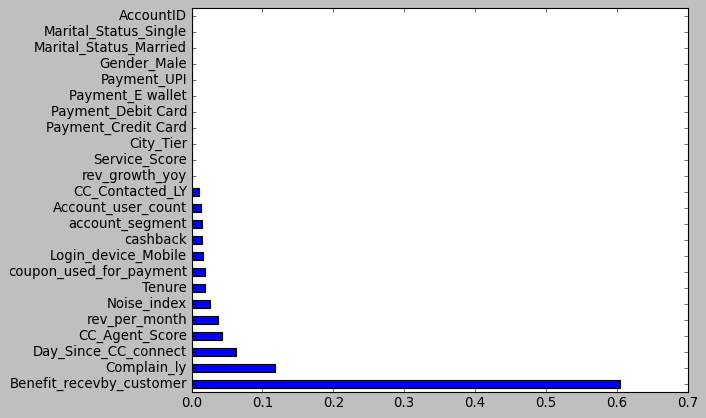

In [308]:
(pd.Series(importance, index=X_train.columns)
   .nlargest(25)
   .plot(kind='barh'))

In [309]:
## Performance Matrix on train data set
y_train_predict = best_dt_model.predict(X_train)
model_score = best_dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8912022343531801
[[6177  373]
 [ 484  843]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6550
           1       0.69      0.64      0.66      1327

    accuracy                           0.89      7877
   macro avg       0.81      0.79      0.80      7877
weighted avg       0.89      0.89      0.89      7877



In [310]:
## Performance Matrix on test data set
y_test_predict = best_dt_model.predict(X_test)
model_score = best_dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8824400355344981
[[2631  177]
 [ 220  349]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2808
           1       0.66      0.61      0.64       569

    accuracy                           0.88      3377
   macro avg       0.79      0.78      0.78      3377
weighted avg       0.88      0.88      0.88      3377

